# Minería de Datos - LAB 01
**Programadores:** 
* Diego Rosales
* Diego López
* Erick War


**Fecha:** 3 de febrero de 2026
**Descripción:** Análisis exploratorio del dataset movies_2026.csv.

## Librerías a utilizar
- **NumPy:** operaciones numéricas.
- **Pandas:** carga y manipulación de datos.
- **Matplotlib:** visualización básica.
- **SciPy / Stats:** pruebas estadísticas y distribuciones.
- **Statsmodels:** diagnósticos y modelos estadísticos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, probplot, shapiro, kstest, spearmanr
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

## Configuración inicial
- Ajustes de visualización de columnas y filas.
- Lectura del archivo de datos (movies_2026.csv).

In [2]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)
# Leer dataset
datos=pd.read_csv("data/movies_2026.csv", encoding='latin-1') 


## EJERCICIO 1: Exploración Rápida (3 puntos)

#### 1. Información Básica del Dataset

In [3]:
# Dimensiones del dataset
filas, columnas = datos.shape
total_celdas = filas * columnas

print("=" * 80)
print("DIMENSIONES DEL DATASET")
print("=" * 80)
print(f"Número de filas:      {filas:,}")
print(f"Número de columnas:   {columnas}")
print(f"Total de celdas:      {total_celdas:,}")
print()


DIMENSIONES DEL DATASET
Número de filas:      19,883
Número de columnas:   28
Total de celdas:      556,724



In [4]:
# Información detallada del dataset
print("=" * 80)
print("INFORMACIÓN DETALLADA (df.info())")
print("=" * 80)
datos.info()


INFORMACIÓN DETALLADA (df.info())
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharac

In [5]:
# Primeras 5 filas
print("\n" + "=" * 80)
print("PRIMERAS 5 FILAS")
print("=" * 80)
datos.head()



PRIMERAS 5 FILAS


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,Javad Hakami,Mohsen Ghasabian|Aida Mahiani|Mehran Ghafouria...,0.3453|0.1664|0.9684|0.3437|0.3713|0.2437|0.27...,|||||||,ØºÙØ·Ù ÙØ±,Immersed,fa,0.0357,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,Kimmy Gatewood,Kameron Jackson|Laura Weaving|sara weaving|Ber...,0|0.0071|0|0,Prince Charming|Evil Stepmother|Fairy Godmothe...,Cinderella,Cinderella,en,0.0357,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,Kimmy Gatewood,Cedric Mitchell|Cajun mills|Laura Williams,0.0193|0|0.0143,Aladdin|Jafar|Jasmine,Aladdin,Aladdin,en,0.0214,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,Felipe RoldÃ¡n,TomÃ¡s Tuchsznajder|Matias Junas|Martin Etchev...,0|0|0|0|0|0|0,||||||,EL ANILLO Y EL DECK,THE RING AND THE DECK,es,0.0429,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,Kimmy Gatewood,Cedric Mitchell|Tara Carpenter|Alissa Carter,0.0193|0.0071|0,Caleb|Sarah|Commander Vex,Crimson High 3,Crimson High 3,en,0.0379,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [6]:
# Últimas 5 filas
print("\n" + "=" * 80)
print("ÚLTIMAS 5 FILAS")
print("=" * 80)
datos.tail()



ÚLTIMAS 5 FILAS


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
19878,920081,0.0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,Mario N. Bonassin,Eric Roberts|Emilia Torello|Joe Herrera|Michel...,18.185|0.828|0.6|0.6|0.6|1.102|3.069|0.6|0.6|0.6,Dr. Malone|Grace|Joaquin|Allison|Rex|Jason|Rit...,Megaboa,Megaboa,en,16.662,2021-11-26,6.8,108,2,1,1,10,2.0,4.0,2021.0
19879,920143,0.0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,Rodrigo Triana,Amparo Grisales|Jhon Álex Toro|Chichila Navia|...,1.55|0.84|0.6|0.6|0.6|0.6|0.6|0.6,La abuela - Raquel|El papá|La mamá|Sarita|El h...,El paseo 6,El Paseo 6,es,491.706,2021-12-25,1.5,2,1,2,1,8,1.0,1.0,2021.0
19880,922017,0.0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,Niyi Akinmolayan,Shaffy Bello-Akinrimisi|Funke Akindele|Joke Si...,0.6|0.98|0.6|0.6|0.6|0.6|0.6|0.6|1.4|0.6|0.6|1...,||||||||||||||||,Chief Daddy 2: Going for Broke,Chief Daddy 2: Going for Broke,en,565.658,2021-12-17,6.1,30,1,1,17,1,0.0,922017.0,2021.0
19881,922162,0.0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,NaN,NaN,NaN,922162,The Witcher: Fireplace,The Witcher: Fireplace,en,9.664,2021-12-17,6.0,1,1,0,0,0,922162.0,NaN,2021.0
19882,922260,254056.0,Mystery|Thriller|Horror,NaN,Central Partnership|KIT Film Studio,RU|RU,Russia,254042.0,0,NaN,Alexandr Babaev,FALSE,7.402|3.103|8.74|7.158|2.951|0.6|1.214|9.197,|||||||,Row 19,Row 19,ru,83.747,2021-11-11,4.7,3,3,2,1,8,4.0,3.0,2021.0


#### 2. Estadísticas Descriptivas

In [38]:
# Estadísticas descriptivas para variables numéricas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)
datos.describe()


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear,ganancias
count,1.988300e+04,1.988300e+04,1.988300e+04,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19846.000000,19721.000000,19881.000000,1.988300e+04
mean,9.022402e+05,9.413280e+06,2.879213e+07,66.093799,26.248842,3.837069,675.927325,1.949253,1.972539,1.230247,1082.049640,3516.505996,8224.352061,2016.827222,1.937885e+07
std,6.848978e+05,2.774781e+07,1.109805e+08,50.089055,156.067177,3.397705,1938.194656,1.256225,2.312075,2.244688,26402.818732,47768.661984,71257.943156,12.838005,9.114968e+07
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1902.000000,-2.000000e+08
25%,1.462195e+05,0.000000e+00,0.000000e+00,10.000000,0.054600,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2013.000000,0.000000e+00
50%,8.696230e+05,0.000000e+00,0.000000e+00,86.000000,8.502000,5.400000,6.000000,2.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2021.000000,0.000000e+00
75%,1.589602e+06,1.000000e+06,3.306335e+05,103.000000,22.239000,6.800000,423.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000,2025.000000,0.000000e+00
max,1.627166e+06,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000,2026.000000,2.610246e+09


In [39]:
# Estadísticas descriptivas para variables categóricas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 80)
datos.describe(include='object')



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS


,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,releaseDate,genero_principal
count,17918,5607,14223,11473,16009,19397,18907,17282,17275,17048,19882,19882,19883,19881,17918
unique,2827,5487,12232,2744,1406,2,13668,16733,15134,14968,19507,19385,94,5663,19
top,Documentary,https://watch.njpwworld.com/details/60769,Paramount,US,United States of America,False,Steven Spielberg,FALSE,0,|,Cinderella,Cinderella,en,2026-01-30,Drama
freq,1847,16,55,1186,4968,19313,29,480,311,233,4,5,11961,263,3734


In [9]:
# Tabla resumen de tipos de datos
print("\n" + "=" * 80)
print("RESUMEN DE TIPOS DE DATOS")
print("=" * 80)
tipos_datos = datos.dtypes.value_counts().sort_values(ascending=False)
tabla_tipos = pd.DataFrame({
    'Tipo de Dato': tipos_datos.index.astype(str),
    'Conteo': tipos_datos.values
})
print(tabla_tipos.to_string(index=False))



RESUMEN DE TIPOS DE DATOS
Tipo de Dato  Conteo
      object      14
       int64       7
     float64       7


#### 2.1 Estadísticas de Variables Multivaluadas
El dataset contiene variables que almacenan múltiples valores separados por tuberías (`|`). A continuación, se presenta un análisis específico para estas columnas.


In [10]:
# Definición de variables multivaluadas
cols_multivaluadas_cat = ['genres', 'productionCompany', 'productionCompanyCountry', 'actors', 'actorsCharacter']
cols_multivaluadas_num = ['actorsPopularity']

print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES MULTIVALUADAS")
print("=" * 80)

def analizar_multivaluado_cat(df, col, sep='|', top_n=10):
    if col not in df.columns:
        return
    
    print(f"\nANÁLISIS VARIABLE: {col}")
    print("-" * 40)
    
    # Separar y explotar
    series_str = df[col].astype(str)
    valores = series_str.str.split(sep).explode()
    
    # Limpieza: eliminar vacíos y 'nan'
    valores = valores[valores.str.strip().str.len() > 0]
    valores = valores[valores != 'nan']
    
    total_unicos = valores.nunique()
    total_items = len(valores)
    promedio_items = total_items / len(df) if len(df) > 0 else 0
    
    print(f"  Total de elementos únicos:      {total_unicos:,}")
    print(f"  Total de ocurrencias:           {total_items:,}")
    print(f"  Promedio de elementos por fila: {promedio_items:.2f}")
    
    if total_unicos > 0:
        print(f"\n  Top {top_n} valores más frecuentes:")
        conteo = valores.value_counts().head(top_n)
        df_conteo = pd.DataFrame({
            'Valor': conteo.index, 
            'Frecuencia': conteo.values,
            '% Total Items': (conteo.values / total_items * 100).round(2)
        })
        print(df_conteo.to_string(index=False))

# Ejecutar análisis categórico
for col in cols_multivaluadas_cat:
    analizar_multivaluado_cat(datos, col)

# Análisis para actorsPopularity (Numérico multivaluado)
if 'actorsPopularity' in datos.columns:
    print(f"\nANÁLISIS VARIABLE: actorsPopularity (Numérico)")
    print("-" * 40)
    
    # Separar, convertir a numérico y explotar
    pop_vals = datos['actorsPopularity'].astype(str).str.split('|').explode()
    pop_vals_num = pd.to_numeric(pop_vals, errors='coerce')
    pop_vals_num = pop_vals_num.dropna()
    
    if len(pop_vals_num) > 0:
        print(f"  Cantidad de valores válidos: {len(pop_vals_num):,}")
        print(f"  Promedio:                    {pop_vals_num.mean():.4f}")
        print(f"  Mediana:                     {pop_vals_num.median():.4f}")
        print(f"  Desviación Estándar:         {pop_vals_num.std():.4f}")
        print(f"  Mínimo:                      {pop_vals_num.min():.4f}")
        print(f"  Máximo:                      {pop_vals_num.max():.4f}")
        
        # Cuartiles
        q1, q2, q3 = np.percentile(pop_vals_num, [25, 50, 75])
        print(f"  Cuartiles (25%, 50%, 75%):   [{q1:.4f}, {q2:.4f}, {q3:.4f}]")
    else:
        print("  No se encontraron valores numéricos válidos.")


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES MULTIVALUADAS

ANÁLISIS VARIABLE: genres
----------------------------------------
  Total de elementos únicos:      19
  Total de ocurrencias:           38,643
  Promedio de elementos por fila: 1.94

  Top 10 valores más frecuentes:
      Valor  Frecuencia  % Total Items
      Drama        6561          16.98
     Comedy        4796          12.41
   Thriller        3384           8.76
     Action        3041           7.87
Documentary        2432           6.29
     Horror        2404           6.22
  Adventure        2005           5.19
    Romance        2001           5.18
  Animation        1980           5.12
     Family        1741           4.51

ANÁLISIS VARIABLE: productionCompany
----------------------------------------
  Total de elementos únicos:      15,517
  Total de ocurrencias:           37,943
  Promedio de elementos por fila: 1.91

  Top 10 valores más frecuentes:
                Valor  Frecuencia  % Total Items
Warner Bros. Pict

#### 3. Análisis de Valores Faltantes

In [11]:
# Análisis de valores faltantes
missing_analysis = pd.DataFrame({
    'Variable': datos.columns,
    'Valores_Faltantes': datos.isnull().sum().values,
    'Porcentaje': (datos.isnull().sum() / len(datos) * 100).round(2).values,
    'Tipo_Dato': datos.dtypes.values
})

# Filtrar solo variables con faltantes
missing_with_values = missing_analysis[missing_analysis['Valores_Faltantes'] > 0].sort_values(
    'Valores_Faltantes', ascending=False
)

print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES (Variables con datos faltantes)")
print("=" * 80)
if len(missing_with_values) > 0:
    print(missing_with_values.to_string(index=False))
else:
    print("No hay valores faltantes en el dataset")


ANÁLISIS DE VALORES FALTANTES (Variables con datos faltantes)
                Variable  Valores_Faltantes  Porcentaje Tipo_Dato
                homePage              14276       71.80    object
productionCompanyCountry               8410       42.30    object
       productionCompany               5660       28.47    object
       productionCountry               3874       19.48    object
         actorsCharacter               2835       14.26    object
        actorsPopularity               2608       13.12    object
                  actors               2601       13.08    object
                  genres               1965        9.88    object
                director                976        4.91    object
                   video                486        2.44    object
           castMenAmount                162        0.81   float64
         castWomenAmount                 37        0.19   float64
             releaseDate                  2        0.01    object
             r

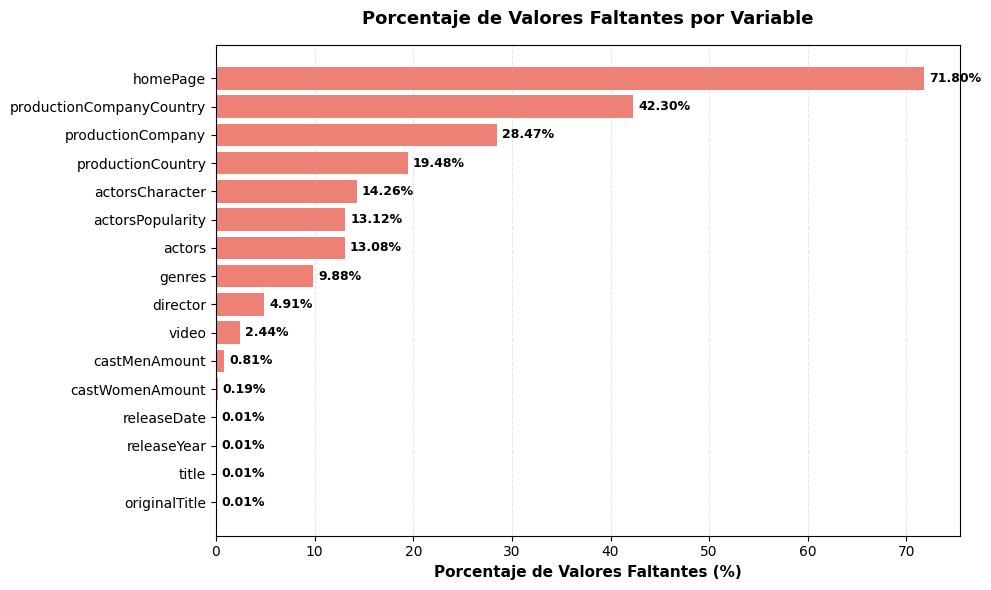

In [12]:
# Gráfico de barras horizontales de valores faltantes
if len(missing_with_values) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    y_pos = np.arange(len(missing_with_values))
    ax.barh(y_pos, missing_with_values['Porcentaje'].values, color='#e74c3c', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(missing_with_values['Variable'].values, fontsize=10)
    ax.invert_yaxis()
    
    ax.set_xlabel('Porcentaje de Valores Faltantes (%)', fontsize=11, fontweight='bold')
    ax.set_title('Porcentaje de Valores Faltantes por Variable', fontsize=13, fontweight='bold', pad=15)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Añadir valores en las barras
    for i, (idx, row) in enumerate(missing_with_values.iterrows()):
        ax.text(row['Porcentaje'] + 0.5, i, f"{row['Porcentaje']:.2f}%", 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


#### 4. Análisis de Valores Duplicados

In [13]:
# Análisis de duplicados
duplicados = datos.duplicated().sum()
porcentaje_duplicados = (duplicados / len(datos)) * 100

print("=" * 80)
print("ANÁLISIS DE VALORES DUPLICADOS")
print("=" * 80)
print(f"Número de filas duplicadas:     {duplicados:,}")
print(f"Porcentaje de duplicados:       {porcentaje_duplicados:.2f}%")
print(f"Filas únicas:                   {len(datos) - duplicados:,}")


ANÁLISIS DE VALORES DUPLICADOS
Número de filas duplicadas:     0
Porcentaje de duplicados:       0.00%
Filas únicas:                   19,883


#### 5. Resumen de Variables Clave

In [14]:
# Resumen de variables clave
print("=" * 80)
print("RESUMEN DE VARIABLES CLAVE")
print("=" * 80)

# Año de lanzamiento
if 'releaseYear' in datos.columns:
    print(f"\nAÑO DE LANZAMIENTO (releaseYear)")
    print(f"  Año mínimo:                 {datos['releaseYear'].min():.0f}")
    print(f"  Año máximo:                 {datos['releaseYear'].max():.0f}")

# Presupuesto
if 'budget' in datos.columns:
    print(f"\nPRESUPUESTO (budget)")
    print(f"  Promedio:                   ${datos['budget'].mean():,.2f}")
    print(f"  Mediana:                    ${datos['budget'].median():,.2f}")
    print(f"  Mínimo:                     ${datos['budget'].min():,.2f}")
    print(f"  Máximo:                     ${datos['budget'].max():,.2f}")

# Ingresos
if 'revenue' in datos.columns:
    print(f"\nINGRESOS (revenue)")
    print(f"  Promedio:                   ${datos['revenue'].mean():,.2f}")
    print(f"  Mediana:                    ${datos['revenue'].median():,.2f}")
    print(f"  Mínimo:                     ${datos['revenue'].min():,.2f}")
    print(f"  Máximo:                     ${datos['revenue'].max():,.2f}")

# Calificaciones
if 'voteAvg' in datos.columns:
    print(f"\nCALIFICACIONES (voteAvg)")
    print(f"  Promedio:                   {datos['voteAvg'].mean():.2f}")
    print(f"  Mediana:                    {datos['voteAvg'].median():.2f}")
    print(f"  Mínimo:                     {datos['voteAvg'].min():.2f}")
    print(f"  Máximo:                     {datos['voteAvg'].max():.2f}")

# Votos
if 'voteCount' in datos.columns:
    print(f"\nVOTOS (voteCount)")
    print(f"  Promedio:                   {datos['voteCount'].mean():,.0f}")
    print(f"  Mediana:                    {datos['voteCount'].median():,.0f}")
    print(f"  Máximo:                     {datos['voteCount'].max():,.0f}")

# Popularidad
if 'popularity' in datos.columns:
    print(f"\nPOPULARIDAD (popularity)")
    print(f"  Promedio:                   {datos['popularity'].mean():.2f}")
    print(f"  Mediana:                    {datos['popularity'].median():.2f}")
    print(f"  Máximo:                     {datos['popularity'].max():.2f}")

# Runtime
if 'runtime' in datos.columns:
    print(f"\nDURAÓN (runtime - minutos)")
    print(f"  Promedio:                   {datos['runtime'].mean():.2f} minutos")
    print(f"  Mediana:                    {datos['runtime'].median():.2f} minutos")
    print(f"  Mínimo:                     {datos['runtime'].min():.0f} minutos")
    print(f"  Máximo:                     {datos['runtime'].max():.0f} minutos")


RESUMEN DE VARIABLES CLAVE

AÑO DE LANZAMIENTO (releaseYear)
  Año mínimo:                 1902
  Año máximo:                 2026

PRESUPUESTO (budget)
  Promedio:                   $9,413,279.82
  Mediana:                    $0.00
  Mínimo:                     $0.00
  Máximo:                     $380,000,000.00

INGRESOS (revenue)
  Promedio:                   $28,792,133.68
  Mediana:                    $0.00
  Mínimo:                     $0.00
  Máximo:                     $2,847,246,203.00

CALIFICACIONES (voteAvg)
  Promedio:                   3.84
  Mediana:                    5.40
  Mínimo:                     0.00
  Máximo:                     10.00

VOTOS (voteCount)
  Promedio:                   676
  Mediana:                    6
  Máximo:                     30,788

POPULARIDAD (popularity)
  Promedio:                   26.25
  Mediana:                    8.50
  Máximo:                     11474.65

DURAÓN (runtime - minutos)
  Promedio:                   66.09 minutos
  M

#### 6. Análisis de Calidad de Datos

In [15]:
# Análisis de calidad de datos
print("=" * 80)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 80)

# Películas con budget = 0
if 'budget' in datos.columns:
    budget_zero = (datos['budget'] == 0).sum()
    pct_budget_zero = (budget_zero / len(datos)) * 100
    print(f"\nPelículas con presupuesto = 0:")
    print(f"  Cantidad:                   {budget_zero:,}")
    print(f"  Porcentaje:                 {pct_budget_zero:.2f}%")

# Películas con revenue = 0
if 'revenue' in datos.columns:
    revenue_zero = (datos['revenue'] == 0).sum()
    pct_revenue_zero = (revenue_zero / len(datos)) * 100
    print(f"\nPelículas con ingresos = 0:")
    print(f"  Cantidad:                   {revenue_zero:,}")
    print(f"  Porcentaje:                 {pct_revenue_zero:.2f}%")

# Películas con runtime = 0
if 'runtime' in datos.columns:
    runtime_zero = (datos['runtime'] == 0).sum()
    pct_runtime_zero = (runtime_zero / len(datos)) * 100
    print(f"\nPelículas con duración = 0:")
    print(f"  Cantidad:                   {runtime_zero:,}")
    print(f"  Porcentaje:                 {pct_runtime_zero:.2f}%")

# Películas con voteCount = 0
if 'voteCount' in datos.columns:
    votecount_zero = (datos['voteCount'] == 0).sum()
    pct_votecount_zero = (votecount_zero / len(datos)) * 100
    print(f"\nPelículas con votos = 0:")
    print(f"  Cantidad:                   {votecount_zero:,}")
    print(f"  Porcentaje:                 {pct_votecount_zero:.2f}%")


ANÁLISIS DE CALIDAD DE DATOS

Películas con presupuesto = 0:
  Cantidad:                   13,281
  Porcentaje:                 66.80%

Películas con ingresos = 0:
  Cantidad:                   14,485
  Porcentaje:                 72.85%

Películas con duración = 0:
  Cantidad:                   2,951
  Porcentaje:                 14.84%

Películas con votos = 0:
  Cantidad:                   8,302
  Porcentaje:                 41.75%


## EJERCICIO 3: Normalidad de variables cuantitativas y tabla de frecuencias de variables cualitativas (6 puntos)

### 3.1 Análisis de Normalidad de Variables Cuantitativas

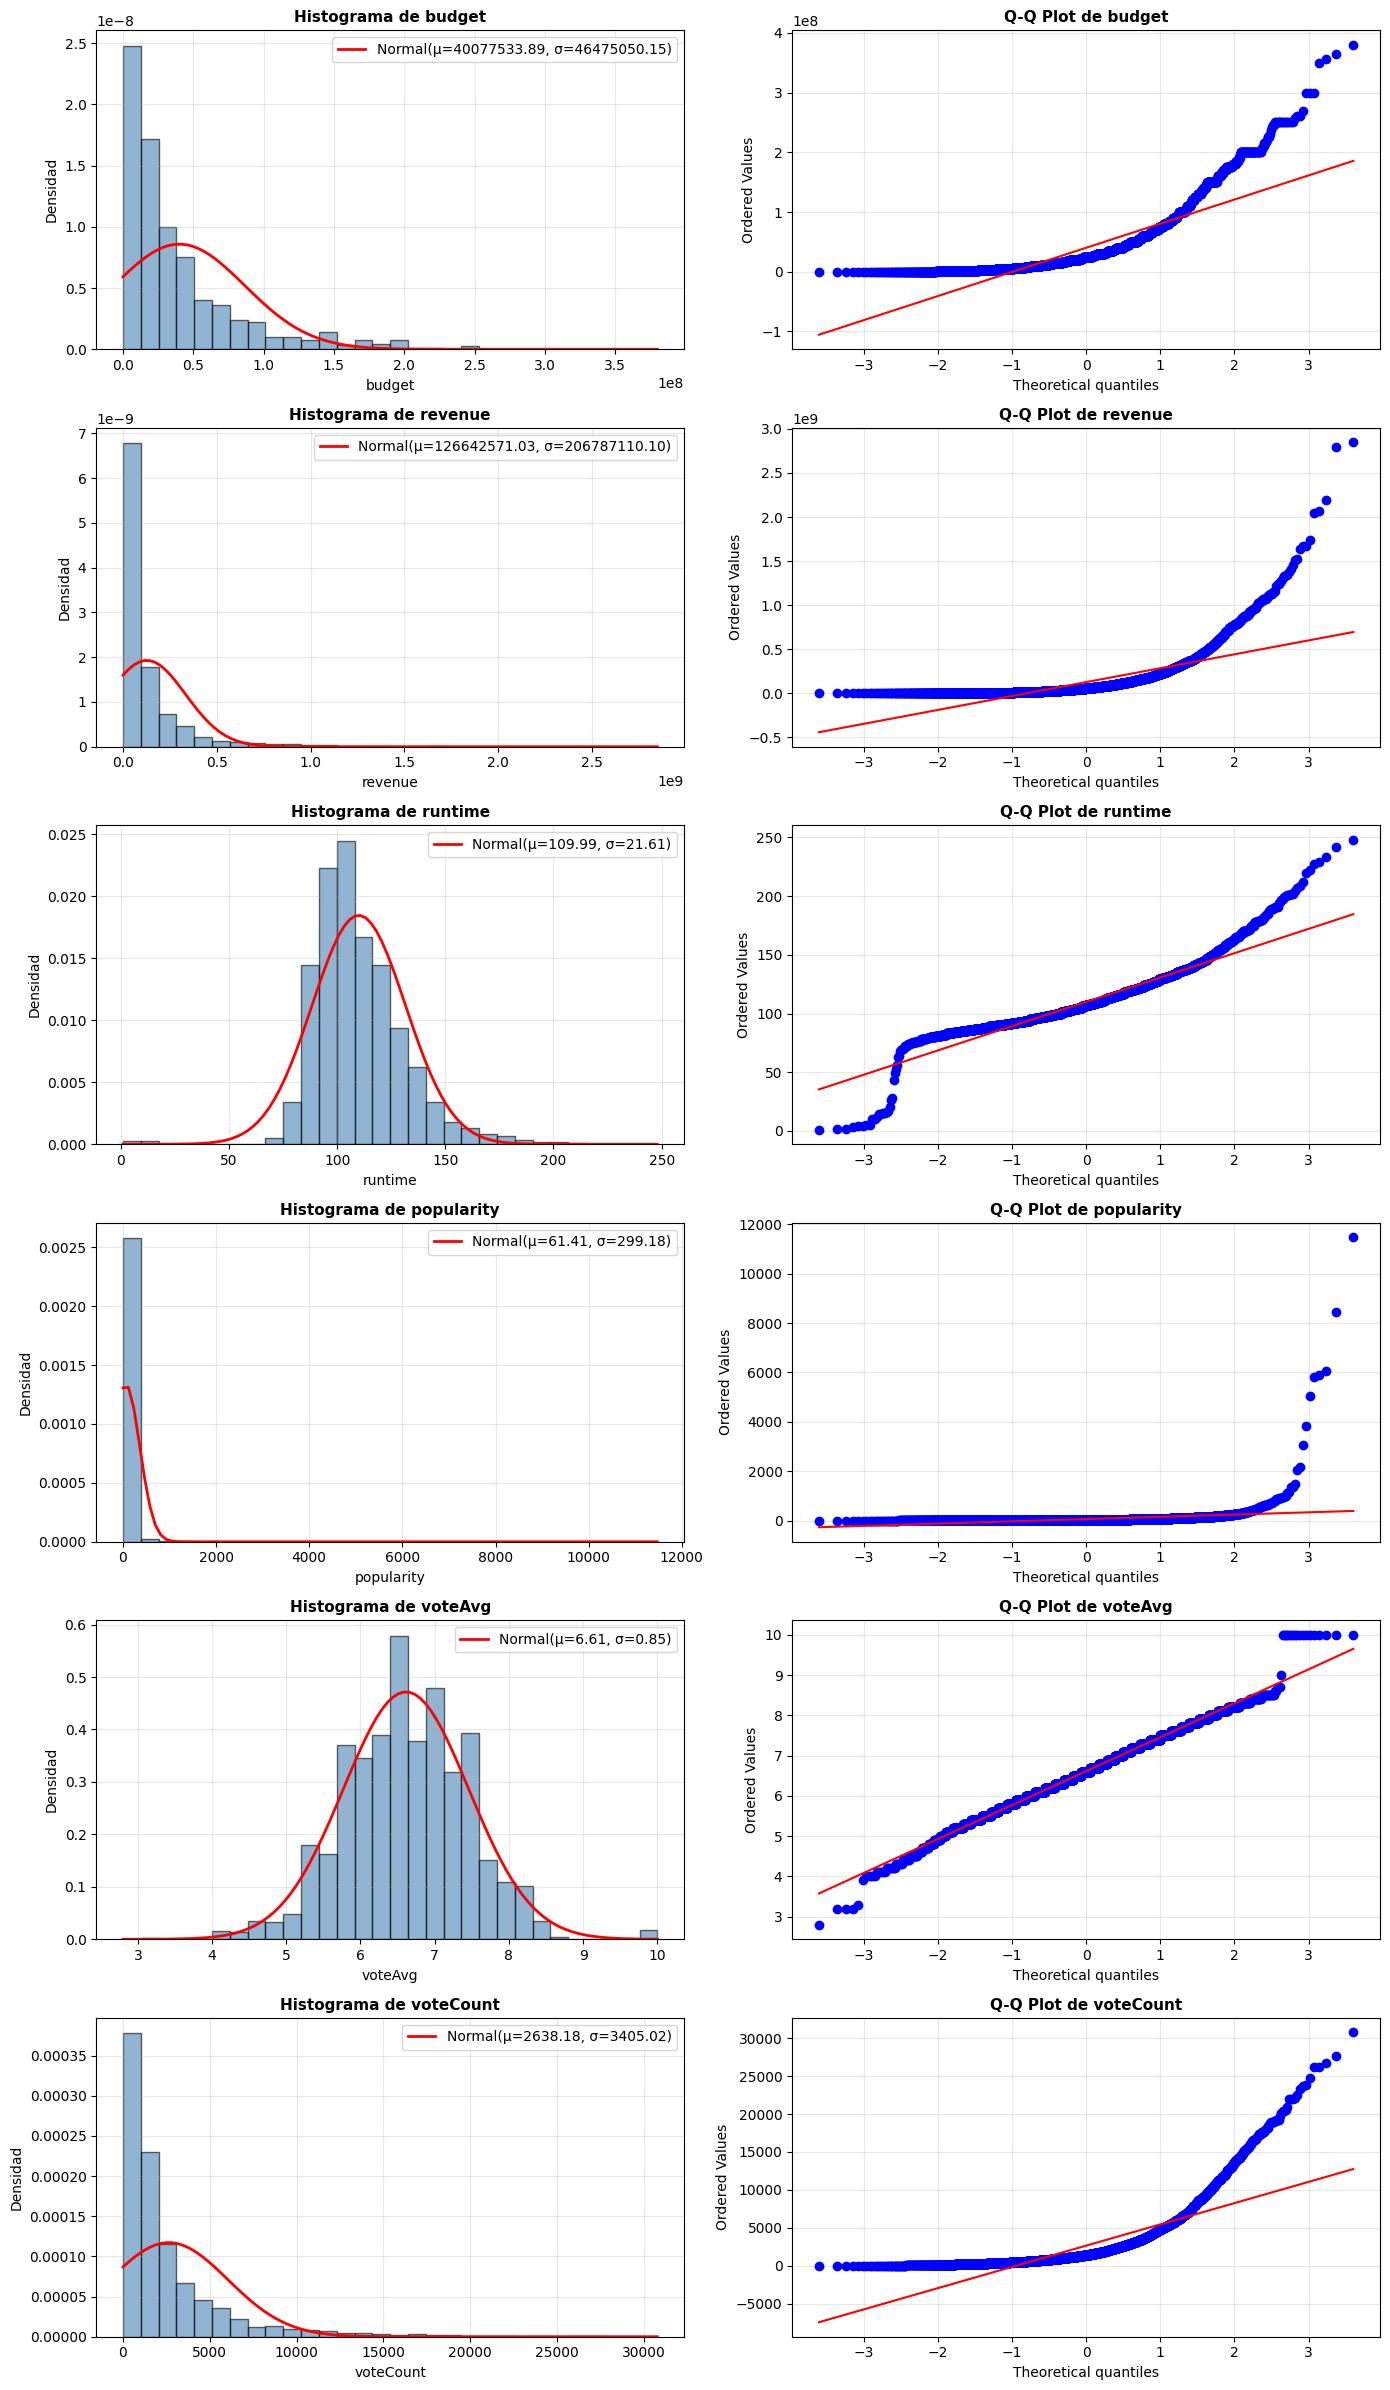

ANÁLISIS DE NORMALIDAD - VARIABLES CUANTITATIVAS

Cantidad de observaciones analizadas: 4,403
(Se excluyeron valores cero y nulos)



In [16]:
vars_cuant = [
    'budget',
    'revenue',
    'runtime',
    'popularity',
    'voteAvg',
    'voteCount'
]

# Preparar datos: eliminar ceros y valores nulos
datos_cuant = datos[vars_cuant].copy()
for col in vars_cuant:
    datos_cuant[col] = datos_cuant[col].replace(0, np.nan)

datos_cuant = datos_cuant.dropna()

# Gráficos de normalidad
n_vars = len(vars_cuant)
cols = 2
rows = n_vars

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))

for i, col in enumerate(vars_cuant):
    data = datos_cuant[col]
    
    # Histograma con curva normal ajustada
    ax1 = axes[i, 0]
    ax1.hist(data, bins=30, density=True, alpha=0.6, color='steelblue', edgecolor='black')
    
    mu, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    ax1.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label=f'Normal(μ={mu:.2f}, σ={std:.2f})')
    
    ax1.set_title(f'Histograma de {col}', fontweight='bold', fontsize=11)
    ax1.set_xlabel(col, fontsize=10)
    ax1.set_ylabel('Densidad', fontsize=10)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # Q-Q Plot
    ax2 = axes[i, 1]
    probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot de {col}', fontweight='bold', fontsize=11)
    ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 80)
print("ANÁLISIS DE NORMALIDAD - VARIABLES CUANTITATIVAS")
print("=" * 80)
print(f"\nCantidad de observaciones analizadas: {len(datos_cuant):,}")
print(f"(Se excluyeron valores cero y nulos)\n")

In [17]:
# Pruebas estadísticas de normalidad
print("=" * 80)
print("PRUEBAS ESTADÍSTICAS DE NORMALIDAD")
print("=" * 80)
print("\nCriterio de interpretación:")
print("  - p-valor > 0.05: Los datos siguen una distribución normal")
print("  - p-valor ≤ 0.05: Los datos NO siguen una distribución normal")
print("\n" + "-" * 80)

resultados_normalidad = []

for col in vars_cuant:
    data = datos_cuant[col]
    
    # Prueba de Shapiro-Wilk (mejor para n < 5000)
    stat_shapiro, p_shapiro = shapiro(data)
    
    # Prueba de Kolmogorov-Smirnov
    stat_ks, p_ks = kstest(data, 'norm', args=(data.mean(), data.std()))
    
    # Determinar normalidad
    es_normal_shapiro = "Sí" if p_shapiro > 0.05 else "No"
    es_normal_ks = "Sí" if p_ks > 0.05 else "No"
    
    resultados_normalidad.append({
        'Variable': col,
        'Shapiro-Wilk': f"{stat_shapiro:.4f}",
        'p-valor (SW)': f"{p_shapiro:.4e}",
        'Normal (SW)': es_normal_shapiro,
        'Kolmogorov-Smirnov': f"{stat_ks:.4f}",
        'p-valor (KS)': f"{p_ks:.4e}",
        'Normal (KS)': es_normal_ks
    })

# Crear DataFrame con resultados
df_normalidad = pd.DataFrame(resultados_normalidad)

print("\nResultados de las pruebas de normalidad:\n")
print(df_normalidad.to_string(index=False))

# Resumen
print("\n" + "=" * 80)
print("RESUMEN DE NORMALIDAD")
print("=" * 80)

normal_shapiro = df_normalidad[df_normalidad['Normal (SW)'] == 'Sí']['Variable'].tolist()
no_normal_shapiro = df_normalidad[df_normalidad['Normal (SW)'] == 'No']['Variable'].tolist()

print(f"\nVariables con distribución NORMAL (Shapiro-Wilk):")
if normal_shapiro:
    for var in normal_shapiro:
        print(f"  - {var}")
else:
    print("  Ninguna")

print(f"\nVariables SIN distribución normal (Shapiro-Wilk):")
if no_normal_shapiro:
    for var in no_normal_shapiro:
        print(f"  - {var}")
else:
    print("  Ninguna")

PRUEBAS ESTADÍSTICAS DE NORMALIDAD

Criterio de interpretación:
  - p-valor > 0.05: Los datos siguen una distribución normal
  - p-valor ≤ 0.05: Los datos NO siguen una distribución normal

--------------------------------------------------------------------------------

Resultados de las pruebas de normalidad:

  Variable Shapiro-Wilk p-valor (SW) Normal (SW) Kolmogorov-Smirnov p-valor (KS) Normal (KS)
    budget       0.7551   8.5538e-63          No             0.1943  4.6922e-146          No
   revenue       0.5823   2.3048e-73          No             0.2701  2.6031e-284          No
   runtime       0.9185   1.1395e-43          No             0.0822   2.4432e-26          No
popularity       0.0949   3.6607e-90          No             0.4215   0.0000e+00          No
   voteAvg       0.9914   1.1690e-15          No             0.0290   1.2157e-03          No
 voteCount       0.6780   4.1578e-68          No             0.2193  1.6897e-186          No

RESUMEN DE NORMALIDAD

Variables c

### 3.2 Tablas de Frecuencias de Variables Cualitativas

In [18]:
# Variables cualitativas del dataset
vars_cualitativas = datos.select_dtypes(include=['object', 'string']).columns.tolist()

# Separar en dos grupos: simples y multivaluadas
vars_multivaluadas = ['genres', 'productionCompany', 'productionCompanyCountry', 
                      'actors', 'actorsCharacter']

vars_cualitativas = [var for var in vars_cualitativas if var != 'actorsPopularity']


vars_cualitativas_simples = [var for var in vars_cualitativas if var not in vars_multivaluadas]

print("=" * 80)
print("TABLAS DE FRECUENCIAS - VARIABLES CUALITATIVAS")
print("=" * 80)
print(f"\nVariables cualitativas SIMPLES:       {len(vars_cualitativas_simples)}")
print(f"Variables: {', '.join(vars_cualitativas_simples)}")
print(f"\nVariables cualitativas MULTIVALUADAS: {len(vars_multivaluadas)}")
print(f"Variables: {', '.join(vars_multivaluadas)}")
print("\n" + "=" * 80)

TABLAS DE FRECUENCIAS - VARIABLES CUALITATIVAS

Variables cualitativas SIMPLES:       8
Variables: homePage, productionCountry, video, director, originalTitle, title, originalLanguage, releaseDate

Variables cualitativas MULTIVALUADAS: 5
Variables: genres, productionCompany, productionCompanyCountry, actors, actorsCharacter



In [19]:
# ============================================================================
# PARTE A: TABLAS DE FRECUENCIAS - VARIABLES SIMPLES
# ============================================================================

if len(vars_cualitativas_simples) > 0:
    print("\n" + "=" * 80)
    print("PARTE A: VARIABLES CUALITATIVAS SIMPLES")
    print("=" * 80)
    
    for var in vars_cualitativas_simples:
        if var == 'homePage':
            continue
        print(f"\n{'=' * 80}")
        print(f"VARIABLE: {var}")
        print('=' * 80)
        
        # Calcular frecuencias
        freq_absoluta = datos[var].value_counts().sort_values(ascending=False)
        freq_relativa = (datos[var].value_counts(normalize=True) * 100).sort_values(ascending=False)
        freq_acumulada = freq_absoluta.cumsum()
        freq_rel_acumulada = freq_relativa.cumsum()
        
        # Crear tabla de frecuencias
        tabla_freq = pd.DataFrame({
            'Categoría': freq_absoluta.index,
            'Frecuencia': freq_absoluta.values,
            'Porcentaje (%)': freq_relativa.values.round(2),
            'Frec. Acumulada': freq_acumulada.values,
            '% Acumulado': freq_rel_acumulada.values.round(2)
        })
        
        # Información general
        total_valores = datos[var].notna().sum()
        valores_nulos = datos[var].isna().sum()
        categorias_unicas = datos[var].nunique()
        
        print(f"\nInformación general:")
        print(f"  Total de registros:         {len(datos):,}")
        print(f"  Valores válidos:            {total_valores:,}")
        print(f"  Valores nulos:              {valores_nulos:,}")
        print(f"  Categorías únicas:          {categorias_unicas:,}")
        
        # Mostrar tabla (primeras 15 categorías)
        print(f"\nTabla de Frecuencias (Top 15):")
        print(tabla_freq.head(15).to_string(index=False))
        
        if len(tabla_freq) > 15:
            print(f"\n... y {len(tabla_freq) - 15} categorías más.")
        
        print()
else:
    print("\nNo hay variables cualitativas simples en el dataset.")


PARTE A: VARIABLES CUALITATIVAS SIMPLES

VARIABLE: productionCountry

Información general:
  Total de registros:         19,883
  Valores válidos:            16,009
  Valores nulos:              3,874
  Categorías únicas:          1,406

Tabla de Frecuencias (Top 15):
                              Categoría  Frecuencia  Porcentaje (%)  Frec. Acumulada  % Acumulado
               United States of America        4968           31.03             4968        31.03
                                     US         850            5.31             5818        36.34
                                  Japan         613            3.83             6431        40.17
                                     FR         428            2.67             6859        42.84
                                     GB         357            2.23             7216        45.07
United Kingdom|United States of America         339            2.12             7555        47.19
                                     BR     

In [20]:
# ============================================================================
# PARTE B: TABLAS DE FRECUENCIAS - VARIABLES MULTIVALUADAS
# ============================================================================

print("\n" + "=" * 80)
print("PARTE B: VARIABLES CUALITATIVAS MULTIVALUADAS")
print("=" * 80)
print("Estas variables contienen múltiples valores separados por '|'")
print("Se analizará cada valor individual.")
print("=" * 80)

for var in vars_multivaluadas:
    if var not in datos.columns:
        continue
    
    print(f"\n{'=' * 80}")
    print(f"VARIABLE: {var}")
    print('=' * 80)
    
    # Separar valores por '|' y explotar
    series_str = datos[var].astype(str)
    valores = series_str.str.split('|').explode()
    
    # Limpieza: eliminar vacíos y 'nan'
    valores_limpios = valores[valores.str.strip().str.len() > 0]
    valores_limpios = valores_limpios[valores_limpios != 'nan']
    
    # Información general
    filas_con_datos = datos[var].notna().sum()
    filas_sin_datos = datos[var].isna().sum()
    total_items = len(valores_limpios)
    items_unicos = valores_limpios.nunique()
    promedio_items_por_fila = total_items / filas_con_datos if filas_con_datos > 0 else 0
    
    print(f"\nInformación general:")
    print(f"  Total de registros (películas): {len(datos):,}")
    print(f"  Registros con datos:            {filas_con_datos:,}")
    print(f"  Registros sin datos:            {filas_sin_datos:,}")
    print(f"  Total de items (valores):       {total_items:,}")
    print(f"  Items únicos:                   {items_unicos:,}")
    print(f"  Promedio de items por registro: {promedio_items_por_fila:.2f}")
    
    # Calcular frecuencias
    if len(valores_limpios) > 0:
        freq_absoluta = valores_limpios.value_counts().sort_values(ascending=False)
        freq_relativa = (freq_absoluta / total_items * 100).round(2)
        freq_acumulada = freq_absoluta.cumsum()
        freq_rel_acumulada = freq_relativa.cumsum().round(2)
        
        # Crear tabla de frecuencias
        tabla_freq = pd.DataFrame({
            'Valor': freq_absoluta.index,
            'Frecuencia': freq_absoluta.values,
            'Porcentaje (%)': freq_relativa.values,
            'Frec. Acumulada': freq_acumulada.values,
            '% Acumulado': freq_rel_acumulada.values
        })
        
        # Mostrar tabla (Top 20)
        print(f"\nTabla de Frecuencias (Top 20):")
        print(tabla_freq.head(20).to_string(index=False))
        
        if len(tabla_freq) > 20:
            print(f"\n... y {len(tabla_freq) - 20} valores más.")
    else:
        print("\n  No se encontraron valores válidos.")
    
    print()


PARTE B: VARIABLES CUALITATIVAS MULTIVALUADAS
Estas variables contienen múltiples valores separados por '|'
Se analizará cada valor individual.

VARIABLE: genres

Información general:
  Total de registros (películas): 19,883
  Registros con datos:            17,918
  Registros sin datos:            1,965
  Total de items (valores):       38,643
  Items únicos:                   19
  Promedio de items por registro: 2.16

Tabla de Frecuencias (Top 20):
          Valor  Frecuencia  Porcentaje (%)  Frec. Acumulada  % Acumulado
          Drama        6561           16.98             6561        16.98
         Comedy        4796           12.41            11357        29.39
       Thriller        3384            8.76            14741        38.15
         Action        3041            7.87            17782        46.02
    Documentary        2432            6.29            20214        52.31
         Horror        2404            6.22            22618        58.53
      Adventure        200


VISUALIZACIÓN DE FRECUENCIAS


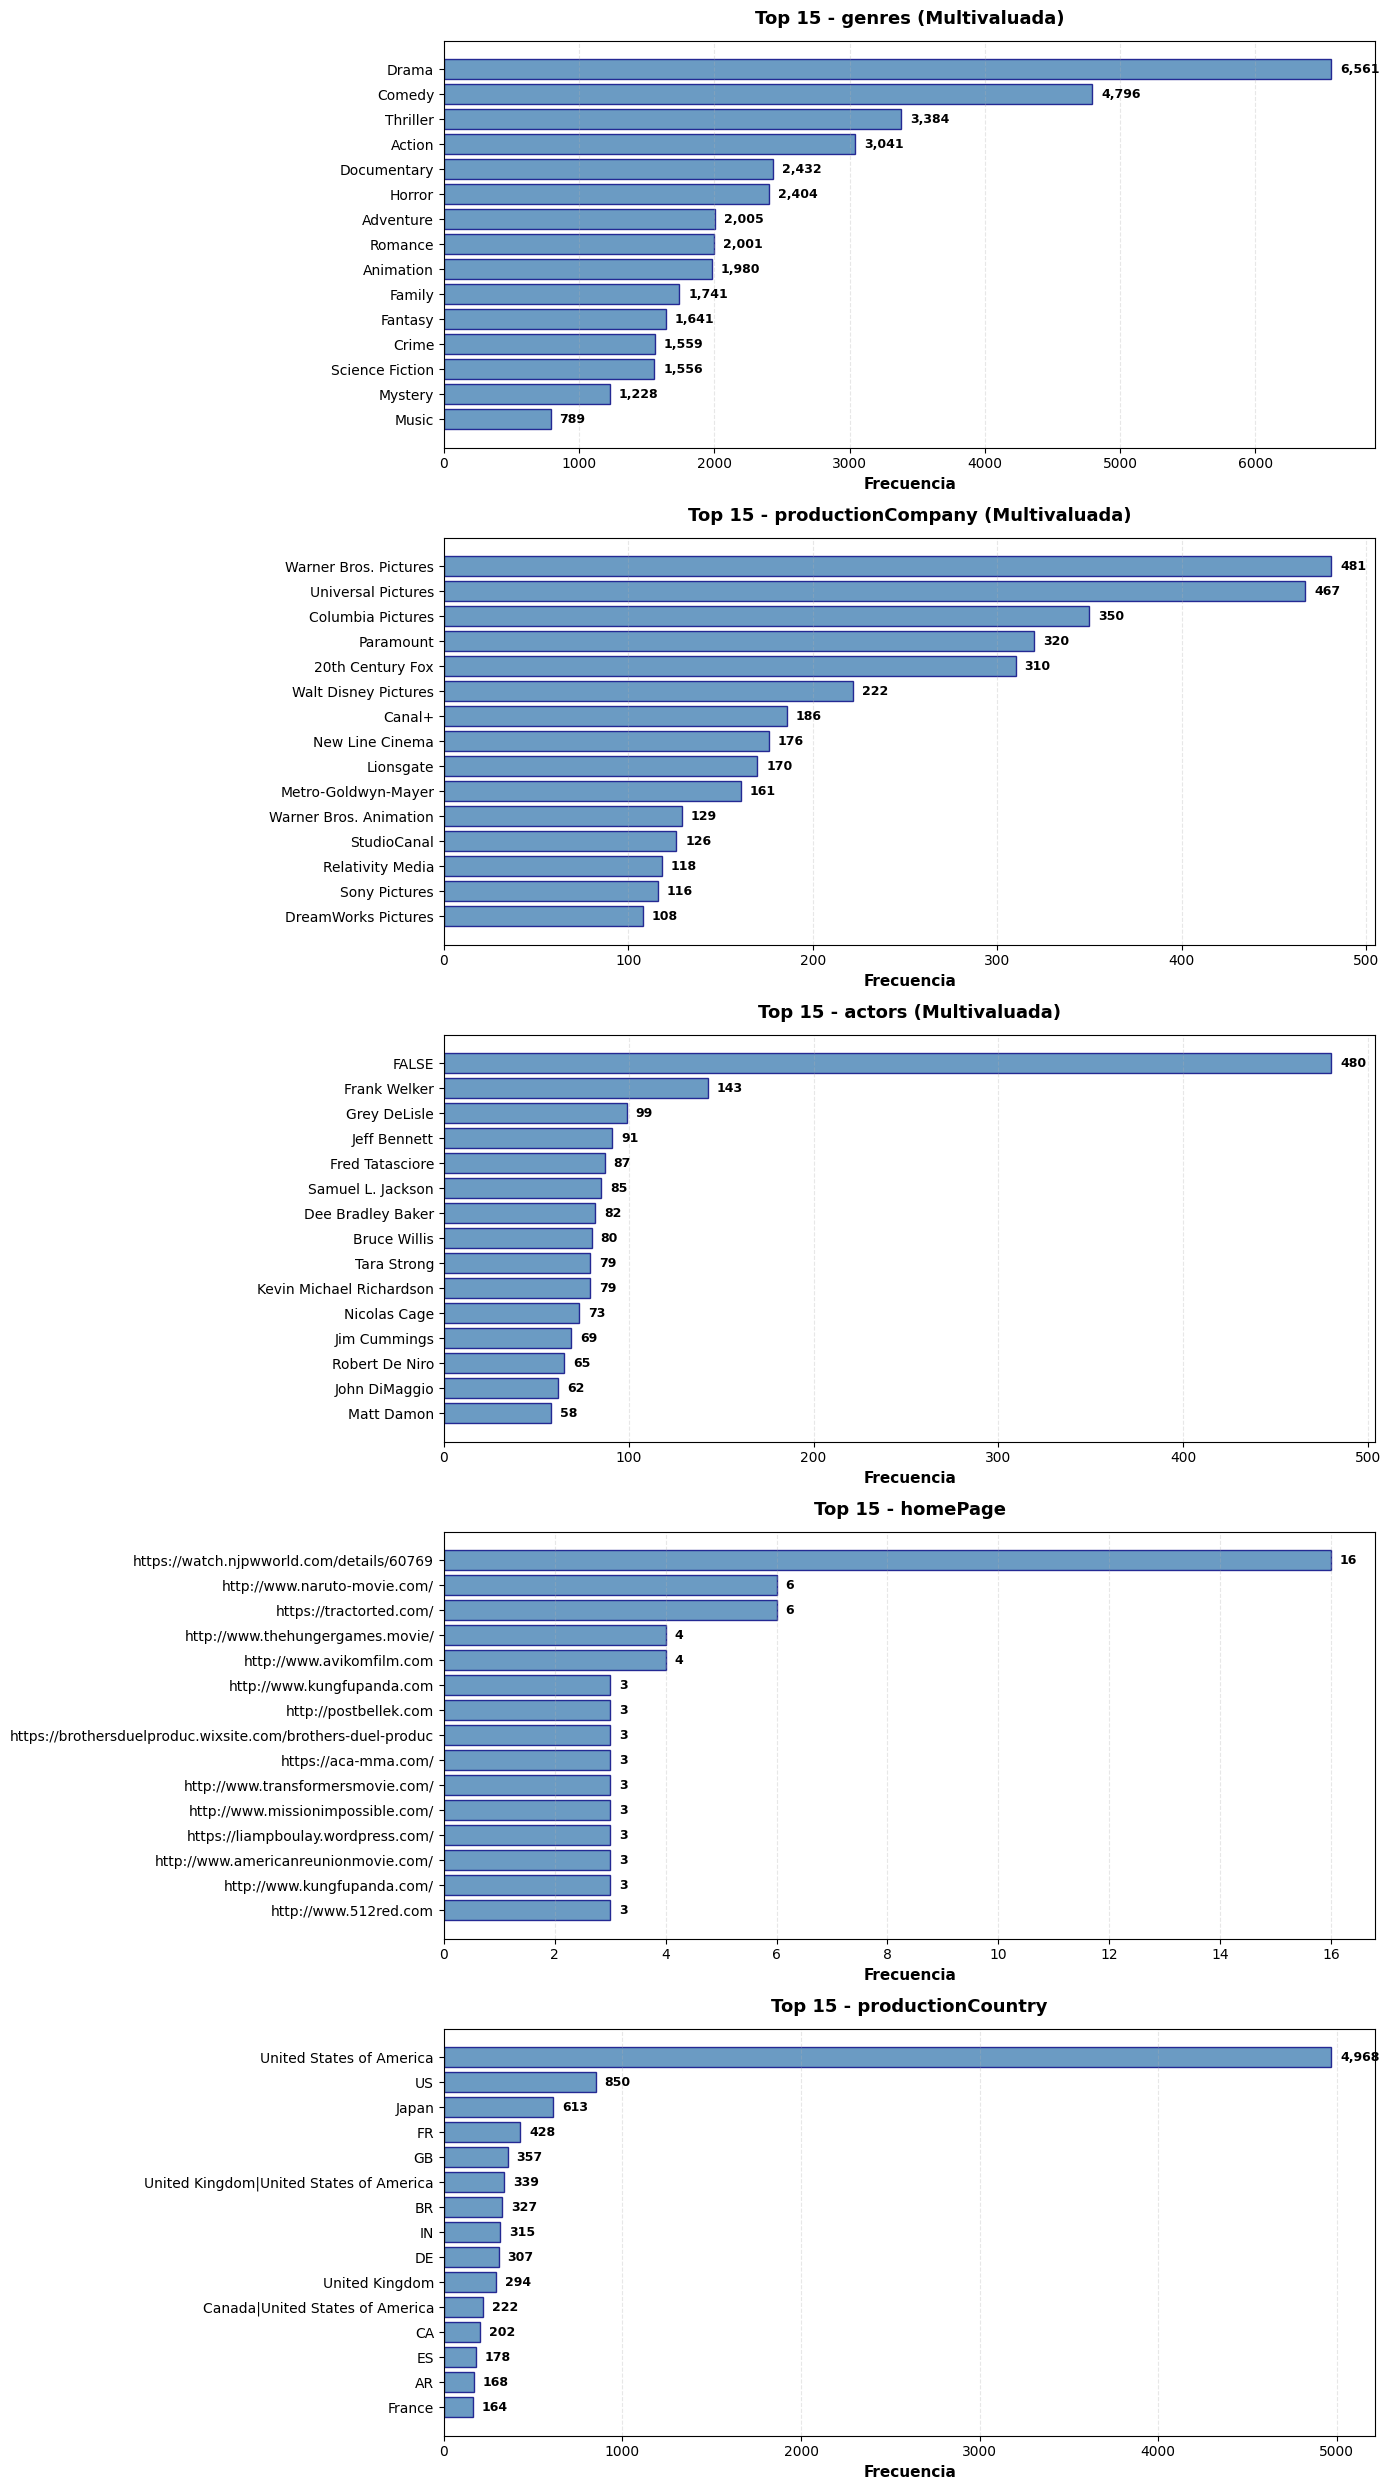


Se generaron 5 gráficos de frecuencias.


In [21]:
# ============================================================================
# VISUALIZACIÓN DE VARIABLES CUALITATIVAS
# ============================================================================

print("\n" + "=" * 80)
print("VISUALIZACIÓN DE FRECUENCIAS")
print("=" * 80)

# Seleccionar variables clave para visualizar
vars_clave_multivaluadas = ['genres', 'productionCompany', 'actors']
vars_clave_simples = vars_cualitativas_simples[:2] if len(vars_cualitativas_simples) >= 2 else vars_cualitativas_simples

# Combinar variables para graficar
todas_vars_graficas = []

# Agregar multivaluadas que existen
for var in vars_clave_multivaluadas:
    if var in datos.columns:
        todas_vars_graficas.append(('multivaluada', var))

# Agregar simples
for var in vars_clave_simples:
    todas_vars_graficas.append(('simple', var))

if len(todas_vars_graficas) > 0:
    n_graficos = len(todas_vars_graficas)
    fig, axes = plt.subplots(n_graficos, 1, figsize=(14, 5 * n_graficos))
    
    # Si solo hay un gráfico, convertir axes a lista
    if n_graficos == 1:
        axes = [axes]
    
    for i, (tipo, var) in enumerate(todas_vars_graficas):
        if tipo == 'multivaluada':
            # Procesar variable multivaluada
            series_str = datos[var].astype(str)
            valores = series_str.str.split('|').explode()
            valores_limpios = valores[valores.str.strip().str.len() > 0]
            valores_limpios = valores_limpios[valores_limpios != 'nan']
            
            if len(valores_limpios) > 0:
                freq = valores_limpios.value_counts().head(15)
                titulo = f'Top 15 - {var} (Multivaluada)'
            else:
                continue
        else:
            # Variable simple
            freq = datos[var].value_counts().head(15)
            titulo = f'Top 15 - {var}'
        
        # Crear gráfico de barras horizontales
        axes[i].barh(range(len(freq)), freq.values, color='steelblue', alpha=0.8, edgecolor='navy')
        axes[i].set_yticks(range(len(freq)))
        axes[i].set_yticklabels(freq.index, fontsize=10)
        axes[i].invert_yaxis()
        axes[i].set_xlabel('Frecuencia', fontsize=11, fontweight='bold')
        axes[i].set_title(titulo, fontsize=13, fontweight='bold', pad=12)
        axes[i].grid(axis='x', alpha=0.3, linestyle='--')
        
        # Añadir valores en las barras
        for j, val in enumerate(freq.values):
            axes[i].text(val + (freq.max() * 0.01), j, f'{val:,}', 
                        va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSe generaron {n_graficos} gráficos de frecuencias.")
else:
    print("\nNo hay variables cualitativas para graficar.")

## EJERCICIO 4: Responder las preguntas (86 puntos)

### 1. ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [ ]:
# 1. ¿Cuáles son las 10 películas que contaron con más presupuesto?
top_10_presupuesto = datos[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)
print("=" * 80)
print("TOP 10 PELÍCULAS CON MÁS PRESUPUESTO")
print("=" * 80)
print(top_10_presupuesto.to_string(index=False))

TOP 10 PELÍCULAS CON MÁS PRESUPUESTO


,title,budget
10606,Pirates of the Caribbean: On Stranger Tides,380000000.0
14600,Avengers: Age of Ultron,365000000.0
15842,Avengers: Endgame,356000000.0
5907,Avatar: Fire and Ash,350000000.0
10053,Pirates of the Caribbean: At World's End,300000000.0
15843,Avengers: Infinity War,300000000.0
14843,Justice League,300000000.0
10497,Superman Returns,270000000.0
13681,Tangled,260000000.0
17024,The Lion King,260000000.0


### 2. ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [23]:
# 2. ¿Cuáles son las 10 películas que más ingresos tuvieron?
top_10_ingresos = datos[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
print("=" * 80)
print("TOP 10 PELÍCULAS CON MÁS INGRESOS")
print("=" * 80)
print(top_10_ingresos.to_string(index=False))

TOP 10 PELÍCULAS CON MÁS INGRESOS
                       title      revenue
                      Avatar 2847246203.0
           Avengers: Endgame 2797800564.0
                     Titanic 2187463944.0
Star Wars: The Force Awakens 2068223624.0
      Avengers: Infinity War 2046239637.0
                  Zootopia 2 1744338246.0
              Jurassic World 1671713208.0
               The Lion King 1667635327.0
     Spider-Man: No Way Home 1631853496.0
                The Avengers 1518815515.0


### 3. ¿Cuál es la película que más votos tuvo?

In [24]:
# 3. ¿Cuál es la película que más votos tuvo?
pelicula_mas_votos = datos[['title', 'voteCount']].sort_values(by='voteCount', ascending=False).head(1)
print("=" * 80)
print("PELÍCULA CON MÁS VOTOS")
print("=" * 80)
print(pelicula_mas_votos.to_string(index=False))

PELÍCULA CON MÁS VOTOS
    title  voteCount
Inception      30788


### 4. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [25]:
# 4. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?
peor_pelicula_votos = datos[['title', 'voteAvg']].sort_values(by='voteAvg', ascending=True).head(1)
print("=" * 80)
print("PEOR PELÍCULA SEGÚN VOTOS DE USUARIOS")
print("=" * 80)
print(peor_pelicula_votos.to_string(index=False))

PEOR PELÍCULA SEGÚN VOTOS DE USUARIOS
          title  voteAvg
Avant de Sortir      0.0


### 5. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras


Año con más películas: 2025.0 (7,351 películas)
CANTIDAD DE PELÍCULAS POR AÑO


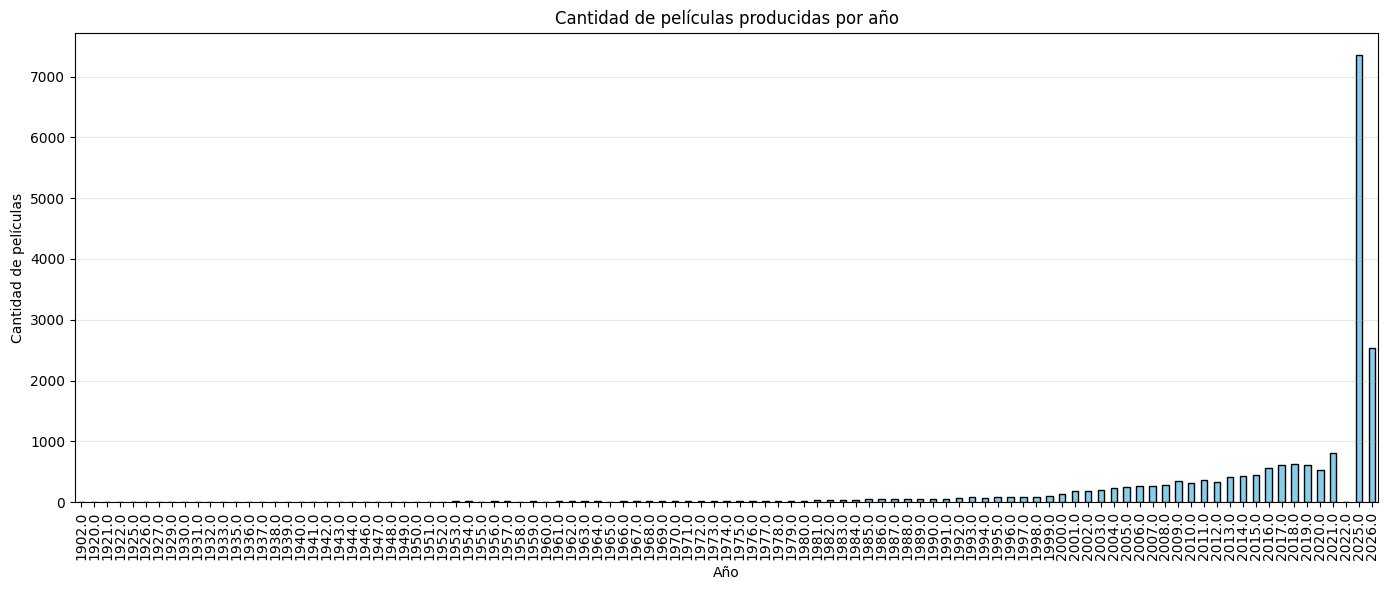

In [26]:
# 5. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas?
peliculas_por_año = datos['releaseYear'].value_counts().sort_index()
año_mas_peliculas = peliculas_por_año.idxmax()
print(f"\nAño con más películas: {año_mas_peliculas} ({peliculas_por_año[año_mas_peliculas]:,} películas)")
print("=" * 80)
print("CANTIDAD DE PELÍCULAS POR AÑO")
print("=" * 80)
#grafica de barras
plt.figure(figsize=(14, 6))
peliculas_por_año.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de películas producidas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 6. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué género principal pertenecen las películas más largas?

EJERCICIO 6: ANÁLISIS DE GÉNEROS

--------------------------------------------------------------------------------
PARTE 1: Género principal de las 20 películas más recientes
--------------------------------------------------------------------------------

Las 20 películas más recientes:
                                          title  releaseYear genero_principal releaseDate
                                       Immersed       2026.0            Drama  2026-02-01
                                     Cinderella       2026.0        Animation  2026-02-01
                                        Aladdin       2026.0        Animation  2026-02-01
                          THE RING AND THE DECK       2026.0         Thriller  2026-02-01
                                 Crimson High 3       2026.0        Animation  2026-02-01
Conversations with Rasparagus Asparagus Baragus       2026.0           Comedy  2026-02-01
                                Highway To Hell       2026.0           Comedy  20

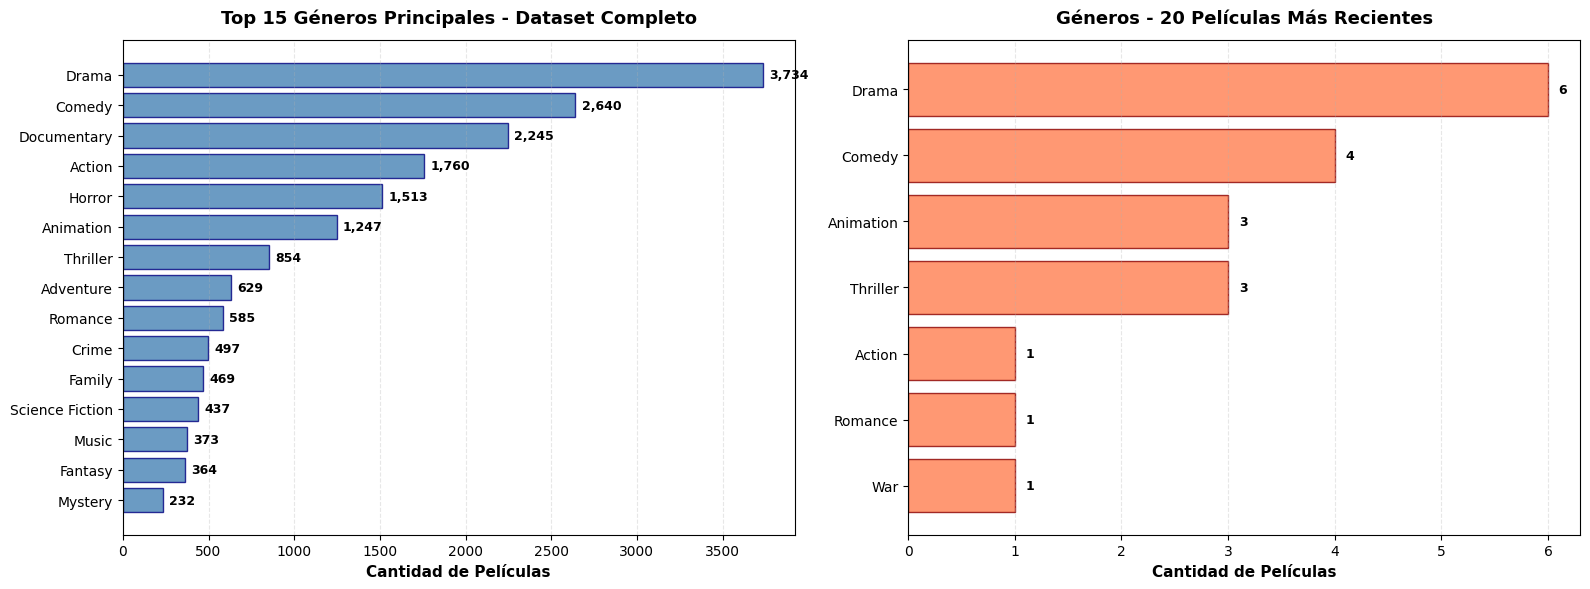


--------------------------------------------------------------------------------
PARTE 4: Género principal de las películas más largas
--------------------------------------------------------------------------------

Las 20 películas más largas:
                                                         title  runtime genero_principal  releaseYear
         How Ponyo was Born ~Hayao Miyazaki's Thought Process~      750      Documentary       2009.0
                                                Before the End      675           Action       2025.0
                 League of Legends Worlds25 - Finals in Cinema      420             None       2025.0
Crystal Lake Memories: The Complete History of Friday the 13th      400      Documentary       2013.0
                              In Search of Darkness: 1995-1999      384      Documentary       2025.0
                               Vu 2025 (lâannÃ©e du zapping)      366             None       2025.0
                                       

In [27]:
# ============================================================================
# EJERCICIO 6: ANÁLISIS DE GÉNEROS
# ============================================================================

print("=" * 80)
print("EJERCICIO 6: ANÁLISIS DE GÉNEROS")
print("=" * 80)

# Función para extraer el primer género (género principal)
def obtener_genero_principal(generos_str):
    """Extrae el primer género de una cadena separada por |"""
    if pd.isna(generos_str) or generos_str == '':
        return None
    return generos_str.split('|')[0].strip()

# Aplicar función para obtener género principal
datos['genero_principal'] = datos['genres'].apply(obtener_genero_principal)

# ============================================================================
# PARTE 1: Género principal de las 20 películas más recientes
# ============================================================================

print("\n" + "-" * 80)
print("PARTE 1: Género principal de las 20 películas más recientes")
print("-" * 80)

# Ordenar por fecha de lanzamiento (más recientes primero)
peliculas_recientes = datos.nlargest(20, 'releaseYear')[['title', 'releaseYear', 'genero_principal', 'releaseDate']]

print("\nLas 20 películas más recientes:")
print(peliculas_recientes.to_string(index=False))

# Contar géneros en las películas recientes
generos_recientes = peliculas_recientes['genero_principal'].value_counts()
print(f"\nDistribución de géneros en las 20 películas más recientes:")
print(generos_recientes.to_string())

# ============================================================================
# PARTE 2: Género principal predominante en todo el dataset
# ============================================================================

print("\n" + "-" * 80)
print("PARTE 2: Género principal predominante en el dataset completo")
print("-" * 80)

# Contar todos los géneros principales
generos_todos = datos['genero_principal'].value_counts()

print(f"\nTop 15 géneros principales más frecuentes:")
tabla_generos = pd.DataFrame({
    'Género': generos_todos.head(15).index,
    'Cantidad': generos_todos.head(15).values,
    'Porcentaje (%)': (generos_todos.head(15).values / len(datos) * 100).round(2)
})
print(tabla_generos.to_string(index=False))

genero_predominante = generos_todos.index[0]
cantidad_predominante = generos_todos.values[0]
porcentaje_predominante = (cantidad_predominante / len(datos) * 100)

print(f"\n El género principal predominante es: {genero_predominante}")
print(f"  - Cantidad de películas: {cantidad_predominante:,}")
print(f"  - Porcentaje: {porcentaje_predominante:.2f}%")

# ============================================================================
# PARTE 3: Gráfico de géneros principales
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Top 15 géneros en todo el dataset
ax1 = axes[0]
top_generos = generos_todos.head(15)
ax1.barh(range(len(top_generos)), top_generos.values, color='steelblue', alpha=0.8, edgecolor='navy')
ax1.set_yticks(range(len(top_generos)))
ax1.set_yticklabels(top_generos.index, fontsize=10)
ax1.invert_yaxis()
ax1.set_xlabel('Cantidad de Películas', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 Géneros Principales - Dataset Completo', fontsize=13, fontweight='bold', pad=12)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for j, val in enumerate(top_generos.values):
    ax1.text(val + (top_generos.max() * 0.01), j, f'{val:,}', 
            va='center', fontsize=9, fontweight='bold')

# Gráfico 2: Géneros en las 20 películas más recientes
ax2 = axes[1]
ax2.barh(range(len(generos_recientes)), generos_recientes.values, color='coral', alpha=0.8, edgecolor='darkred')
ax2.set_yticks(range(len(generos_recientes)))
ax2.set_yticklabels(generos_recientes.index, fontsize=10)
ax2.invert_yaxis()
ax2.set_xlabel('Cantidad de Películas', fontsize=11, fontweight='bold')
ax2.set_title('Géneros - 20 Películas Más Recientes', fontsize=13, fontweight='bold', pad=12)
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir valores en las barras
for j, val in enumerate(generos_recientes.values):
    ax2.text(val + 0.1, j, f'{val}', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# PARTE 4: Género principal de las películas más largas
# ============================================================================

print("\n" + "-" * 80)
print("PARTE 4: Género principal de las películas más largas")
print("-" * 80)

# Filtrar películas con runtime > 0
peliculas_con_runtime = datos[datos['runtime'] > 0].copy()

# Obtener las 20 películas más largas
peliculas_largas = peliculas_con_runtime.nlargest(20, 'runtime')[['title', 'runtime', 'genero_principal', 'releaseYear']]

print("\nLas 20 películas más largas:")
print(peliculas_largas.to_string(index=False))

# Contar géneros en las películas más largas
generos_largas = peliculas_largas['genero_principal'].value_counts()
print(f"\nDistribución de géneros en las 20 películas más largas:")
print(generos_largas.to_string())

# Género predominante en películas largas
genero_largas_predominante = generos_largas.index[0]
print(f"\n El género principal predominante en las películas más largas es: {genero_largas_predominante}")
print(f"  - Aparece en {generos_largas.values[0]} de las 20 películas más largas")

# Estadísticas de runtime por género principal
print("\n" + "-" * 80)
print("Estadísticas de duración (runtime) por género principal (Top 10)")
print("-" * 80)

# Calcular estadísticas por género
stats_runtime = peliculas_con_runtime.groupby('genero_principal')['runtime'].agg([
    ('Cantidad', 'count'),
    ('Promedio', 'mean'),
    ('Mediana', 'median'),
    ('Máximo', 'max'),
    ('Mínimo', 'min')
]).round(2)

# Ordenar por promedio descendente
stats_runtime = stats_runtime.sort_values('Promedio', ascending=False).head(10)

print("\n", stats_runtime.to_string())

print("\n" + "=" * 80)
print("RESUMEN EJERCICIO 6")
print("=" * 80)
print(f"1. Género más común en las 20 películas recientes: {generos_recientes.index[0]}")
print(f"2. Género predominante en el dataset: {genero_predominante} ({porcentaje_predominante:.2f}%)")
print(f"3. Género predominante en películas largas: {genero_largas_predominante}")
print("=" * 80)

### 7. ¿Las películas de qué genero principal obtuvieron mayores ganancias?

In [28]:
# ============================================================================
# EJERCICIO 7: GANANCIAS POR GÉNERO PRINCIPAL
# ============================================================================

print("=" * 80)
print("EJERCICIO 7: ¿PELÍCULAS DE QUÉ GÉNERO PRINCIPAL OBTUVIERON MAYORES GANANCIAS?")
print("=" * 80)

# Calcular ganancias (revenue - budget)
datos['ganancias'] = datos['revenue'] - datos['budget']

# Filtrar películas con datos válidos (revenue > 0 y budget > 0)
datos_con_ganancias = datos[(datos['revenue'] > 0) & (datos['budget'] > 0)].copy()

print(f"\nPelículas analizadas: {len(datos_con_ganancias):,}")

# Agrupar por género principal y calcular ganancias totales
ganancias_por_genero = datos_con_ganancias.groupby('genero_principal').agg({
    'ganancias': ['sum', 'mean', 'count']
}).round(0)

ganancias_por_genero.columns = ['Ganancia_Total', 'Ganancia_Promedio', 'Cantidad_Películas']
ganancias_por_genero = ganancias_por_genero.sort_values('Ganancia_Total', ascending=False)

print("\nGanancias por género principal (ordenado por ganancias totales):\n")
print(ganancias_por_genero.to_string())

print("\n" + "=" * 80)
print("RESPUESTA")
print("=" * 80)
genero_ganador = ganancias_por_genero.index[0]
ganancia_total = ganancias_por_genero.iloc[0]['Ganancia_Total']
cantidad = ganancias_por_genero.iloc[0]['Cantidad_Películas']

print(f"\n El género principal que obtuvo mayores ganancias fue: {genero_ganador}")
print(f"  - Ganancia total: ${ganancia_total:,.0f}")
print(f"  - Número de películas: {int(cantidad)}")
print("=" * 80)

EJERCICIO 7: ¿PELÍCULAS DE QUÉ GÉNERO PRINCIPAL OBTUVIERON MAYORES GANANCIAS?

Películas analizadas: 4,502

Ganancias por género principal (ordenado por ganancias totales):

                  Ganancia_Total  Ganancia_Promedio  Cantidad_Películas
genero_principal                                                       
Action              9.219561e+10        118351236.0                 779
Adventure           6.035407e+10        171948918.0                 351
Comedy              4.922083e+10         61143894.0                 805
Drama               4.258850e+10         49521513.0                 860
Animation           3.200568e+10        176826973.0                 181
Horror              1.802644e+10         48328258.0                 373
Family              1.797826e+10        136198976.0                 132
Science Fiction     1.775765e+10        122466526.0                 145
Fantasy             1.514620e+10        110556183.0                 137
Thriller            1.015124e+10  

### 8. ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años?

EJERCICIO 8: CANTIDAD DE ACTORES
Películas analizadas: 4,294

Relación entre cantidad de actores e ingresos
Correlación Spearman: 0.3686

Ingresos por grupo de actores (mediana):
               Mediana_Ingresos  Cantidad_Películas
grupo_actores                                      
1–5                       400.0                 119
6–10                  3916195.0                 303
11–20                18056464.5                1206
21–50                43029449.0                2666


C:\Users\dijol\AppData\Local\Temp\ipykernel_23512\1444307741.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby('grupo_actores')['revenue'].agg(


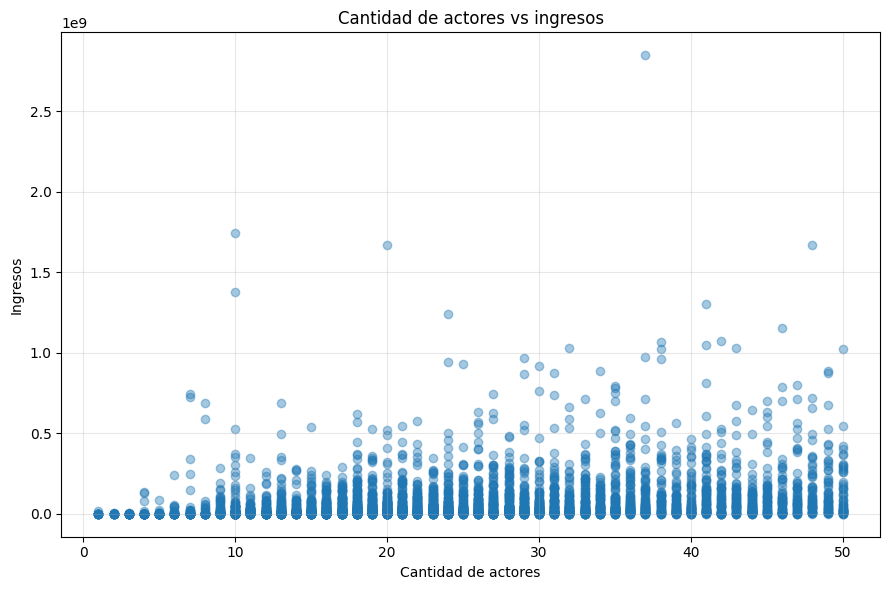


Evolución del número de actores


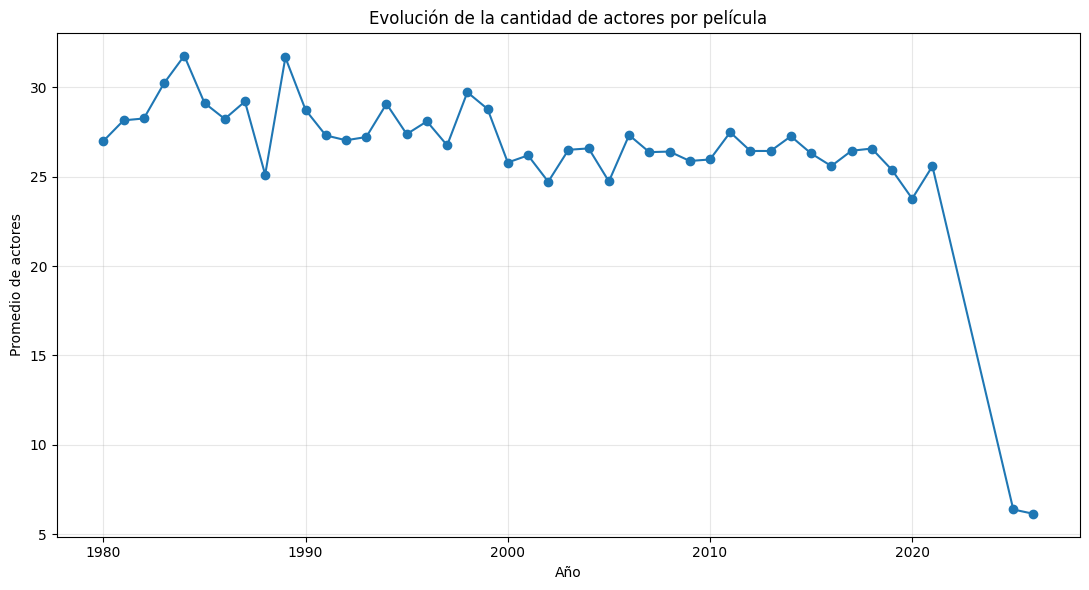


Promedio actores primeros años: 28.88
Promedio actores últimos años:  21.95
Diferencia: -6.93

RESUMEN
Correlación Spearman: 0.3686 (correlación positiva moderada)
El tamaño promedio del elenco disminuyó 6.93 actores


In [29]:


print("=" * 80)
print("EJERCICIO 8: CANTIDAD DE ACTORES")
print("=" * 80)

# ----------------------------------------------------------------------------
# Preparación de datos
# ----------------------------------------------------------------------------

df = datos.copy()

df = df[
    (df['actorsAmount'] > 0) &
    (df['actorsAmount'] <= 50) &
    (df['revenue'] > 0)
].copy()

print(f"Películas analizadas: {len(df):,}")

# ----------------------------------------------------------------------------
# PARTE 1
# ----------------------------------------------------------------------------

print("\nRelación entre cantidad de actores e ingresos")

# Correlación 
corr_spearman, _ = spearmanr(df['actorsAmount'], df['revenue'])
print(f"Correlación Spearman: {corr_spearman:.4f}")

# Se agrupa por rangos de cantidad de actores
df['grupo_actores'] = pd.cut(
    df['actorsAmount'],
    bins=[0, 5, 10, 20, 50],
    labels=['1–5', '6–10', '11–20', '21–50']
)

resumen = df.groupby('grupo_actores')['revenue'].agg(
    Mediana_Ingresos='median',
    Cantidad_Películas='count'
)

print("\nIngresos por grupo de actores (mediana):")
print(resumen.to_string())

# Gráfico simple
plt.figure(figsize=(9,6))
plt.scatter(df['actorsAmount'], df['revenue'], alpha=0.4)
plt.xlabel('Cantidad de actores')
plt.ylabel('Ingresos')
plt.title('Cantidad de actores vs ingresos')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# PARTE 2: ¿Se hacen películas con más actores en los últimos años?
# ----------------------------------------------------------------------------

print("\nEvolución del número de actores")

df_tiempo = df[df['releaseYear'] >= 1980]

actores_por_año = df_tiempo.groupby('releaseYear')['actorsAmount'].mean()

plt.figure(figsize=(11,6))
plt.plot(actores_por_año.index, actores_por_año, marker='o')
plt.xlabel('Año')
plt.ylabel('Promedio de actores')
plt.title('Evolución de la cantidad de actores por película')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Comparación primeros vs últimos 10 años
primeros = actores_por_año.head(10).mean()
ultimos = actores_por_año.tail(10).mean()

print(f"\nPromedio actores primeros años: {primeros:.2f}")
print(f"Promedio actores últimos años:  {ultimos:.2f}")
print(f"Diferencia: {ultimos - primeros:.2f}")

# ----------------------------------------------------------------------------
# RESUMEN
# ----------------------------------------------------------------------------

print("\n" + "=" * 80)
print("RESUMEN")
print("=" * 80)
print(f"Correlación Spearman: {corr_spearman:.4f} (correlación positiva moderada)")
tendencia = "aumentó" if (ultimos - primeros) > 0 else "disminuyó"
print(f"El tamaño promedio del elenco {tendencia} {abs(ultimos - primeros):.2f} actores")
print("=" * 80)


### 9. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

### 10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

### 11. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

EJERCICIO 11: PRESUPUESTO vs INGRESOS

Correlación de Pearson: 0.7229
Películas analizadas: 4,502

Ratio ingresos/presupuesto (mediana): 2.37x


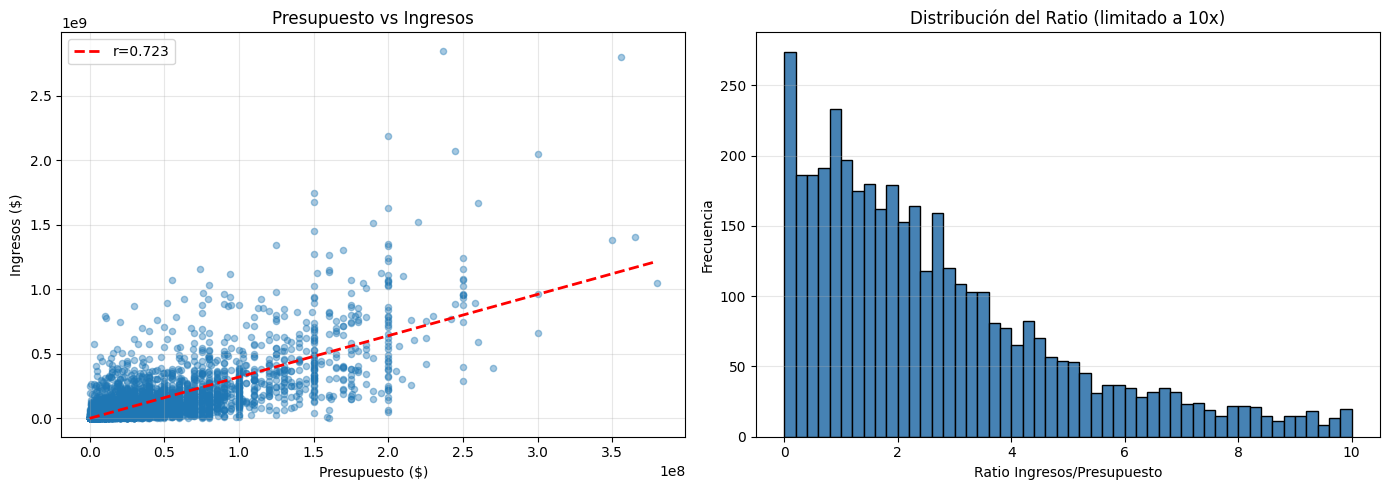

In [30]:
# Ejercicio 11: Correlación Presupuesto vs Ingresos
df = datos[(datos['budget'] > 0) & (datos['revenue'] > 0)].copy()

print("="*60)
print("EJERCICIO 11: PRESUPUESTO vs INGRESOS")
print("="*60)

# Correlación
corr = df['budget'].corr(df['revenue'])
print(f"\nCorrelación de Pearson: {corr:.4f}")
print(f"Películas analizadas: {len(df):,}")

# Ratio ingresos/presupuesto
df['ratio'] = df['revenue'] / df['budget']
print(f"\nRatio ingresos/presupuesto (mediana): {df['ratio'].median():.2f}x")

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dispersión
axes[0].scatter(df['budget'], df['revenue'], alpha=0.4, s=20)
z = np.polyfit(df['budget'], df['revenue'], 1)
p = np.poly1d(z)
x_line = np.array([df['budget'].min(), df['budget'].max()])
axes[0].plot(x_line, p(x_line), "r--", linewidth=2, label=f'r={corr:.3f}')
axes[0].set_xlabel('Presupuesto ($)')
axes[0].set_ylabel('Ingresos ($)')
axes[0].set_title('Presupuesto vs Ingresos')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histograma de ratio
axes[1].hist(df['ratio'][df['ratio'] <= 10], bins=50, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Ratio Ingresos/Presupuesto')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución del Ratio (limitado a 10x)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

EJERCICIO 12: MESES DE LANZAMIENTO VS INGRESOS

Películas analizadas: 5,398

Ingresos por mes (mediana):
         median         mean  count
Ene  27233270.0   60407604.0    368
Feb  41146058.0   82768572.0    366
Mar  37713879.0   97108375.0    429
Abr  32339075.0  102252891.0    358
May  45361000.0  165272557.0    371
Jun  66001002.0  165807439.0    468
Jul  54682547.0  132764089.0    465
Ago  34032922.0   70777333.0    464
Sep  20350754.0   60335029.0    571
Oct  29918745.0   85148627.0    489
Nov  43278503.0  127811630.0    470
Dic  51053787.0  124411468.0    579

 El mejor mes para lanzar es: Jun
  Ingresos medianos: $66,001,002


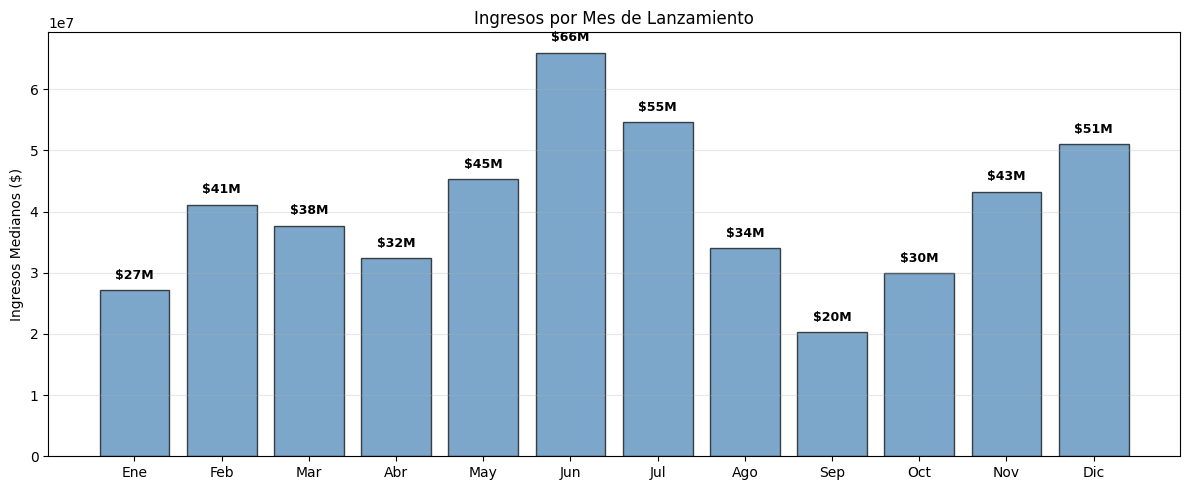

In [31]:
# Ejercicio 12: Meses de lanzamiento vs ingresos
df = datos[(datos['revenue'] > 0) & (datos['releaseDate'].notna())].copy()

# Extraer mes
df['mes'] = pd.to_datetime(df['releaseDate'], errors='coerce').dt.month
df = df[df['mes'].notna()]

print("="*60)
print("EJERCICIO 12: MESES DE LANZAMIENTO VS INGRESOS")
print("="*60)

# Agrupar por mes
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ingresos_por_mes = df.groupby('mes')['revenue'].agg(['median', 'mean', 'count']).round(0)
ingresos_por_mes.index = [meses_nombres[int(i)-1] for i in ingresos_por_mes.index]

print(f"\nPelículas analizadas: {len(df):,}")
print("\nIngresos por mes (mediana):")
print(ingresos_por_mes)

mejor_mes = ingresos_por_mes['median'].idxmax()
print(f"\n El mejor mes para lanzar es: {mejor_mes}")
print(f"  Ingresos medianos: ${ingresos_por_mes.loc[mejor_mes, 'median']:,.0f}")

# Gráfico
fig, ax = plt.subplots(figsize=(12, 5))
x_pos = range(len(ingresos_por_mes))
ax.bar(x_pos, ingresos_por_mes['median'], color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xticks(x_pos)
ax.set_xticklabels(ingresos_por_mes.index)
ax.set_ylabel('Ingresos Medianos ($)')
ax.set_title('Ingresos por Mes de Lanzamiento')
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(ingresos_por_mes['median']):
    ax.text(i, v + (ingresos_por_mes['median'].max() * 0.02), f'${v/1e6:.0f}M', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### 13. ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuantas películas, en promedio, se han lanzado por mes?

EJERCICIO 13: INGRESOS POR MES Y PROMEDIO DE LANZAMIENTOS

Películas analizadas: 5,398
Años totales en análisis: 107.0

Resultados por mes:
                median  count  promedio_lanzamientos
mes_nombre                                          
Ene         27233270.0    368                    3.4
Feb         41146058.0    366                    3.4
Mar         37713879.0    429                    4.0
Abr         32339075.0    358                    3.3
May         45361000.0    371                    3.5
Jun         66001002.0    468                    4.4
Jul         54682547.0    465                    4.3
Ago         34032922.0    464                    4.3
Sep         20350754.0    571                    5.3
Oct         29918745.0    489                    4.6
Nov         43278503.0    470                    4.4
Dic         51053787.0    579                    5.4

 Top 3 meses con mejores ingresos:
  1. Jun: $66,001,002 (mediana)
  2. Jul: $54,682,547 (mediana)
  3. Dic: $51,053,

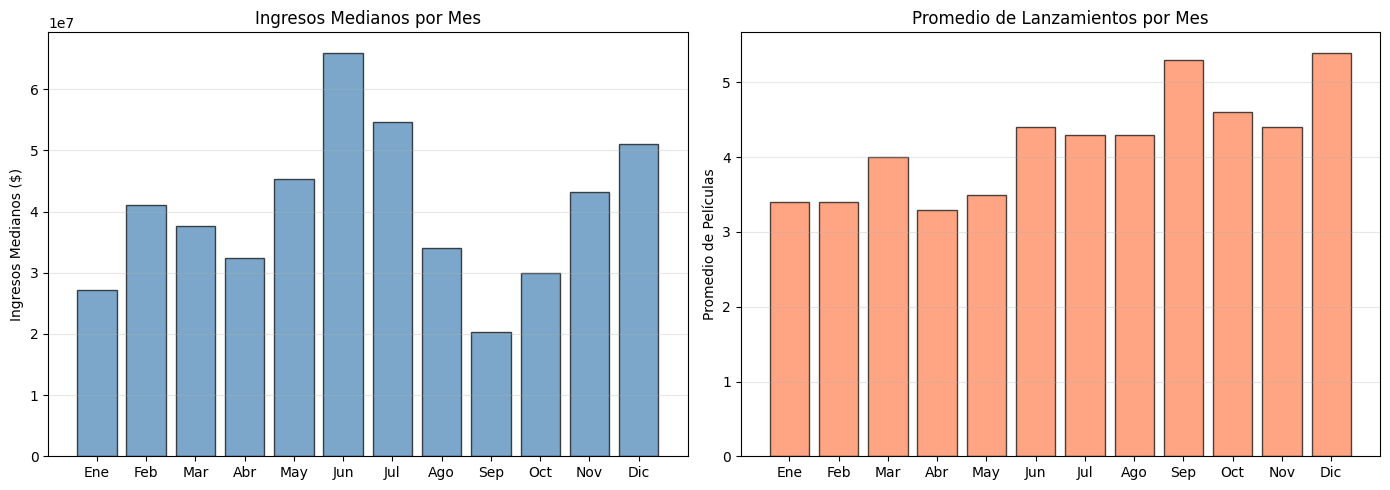

In [32]:
# Ejercicio 13: Meses con mejores ingresos y promedio de lanzamientos
df = datos[(datos['revenue'] > 0) & (datos['releaseDate'].notna())].copy()
df['mes'] = pd.to_datetime(df['releaseDate'], errors='coerce').dt.month
df = df[df['mes'].notna()]

print("="*60)
print("EJERCICIO 13: INGRESOS POR MES Y PROMEDIO DE LANZAMIENTOS")
print("="*60)

# Meses nombres
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Agrupar por mes
analisis_mes = df.groupby('mes')['revenue'].agg(['median', 'count']).round(0)
analisis_mes['mes_nombre'] = [meses_nombres[int(i)-1] for i in analisis_mes.index]
analisis_mes = analisis_mes.set_index('mes_nombre')

print(f"\nPelículas analizadas: {len(df):,}")
print(f"Años totales en análisis: {df['releaseYear'].max() - df['releaseYear'].min() + 1}")
años_totales = df['releaseYear'].max() - df['releaseYear'].min() + 1

# Calcular promedio por mes
analisis_mes['promedio_lanzamientos'] = (analisis_mes['count'] / años_totales).round(1)

print("\nResultados por mes:")
print(analisis_mes[['median', 'count', 'promedio_lanzamientos']].to_string())

# Top 3 mejores meses
top_meses = analisis_mes.nlargest(3, 'median')
print(f"\n Top 3 meses con mejores ingresos:")
for i, (mes, row) in enumerate(top_meses.iterrows(), 1):
    print(f"  {i}. {mes}: ${row['median']:,.0f} (mediana)")

print(f"\n Promedio de películas lanzadas por mes: {analisis_mes['promedio_lanzamientos'].mean():.1f} películas")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ingresos por mes
axes[0].bar(range(len(analisis_mes)), analisis_mes['median'], color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(analisis_mes)))
axes[0].set_xticklabels(analisis_mes.index)
axes[0].set_ylabel('Ingresos Medianos ($)')
axes[0].set_title('Ingresos Medianos por Mes')
axes[0].grid(axis='y', alpha=0.3)

# Cantidad de lanzamientos por mes
axes[1].bar(range(len(analisis_mes)), analisis_mes['promedio_lanzamientos'], color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(analisis_mes)))
axes[1].set_xticklabels(analisis_mes.index)
axes[1].set_ylabel('Promedio de Películas')
axes[1].set_title('Promedio de Lanzamientos por Mes')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 14. ¿Cómo se correlacionan las calificaciones con el éxito comercial?

EJERCICIO 14: CALIFICACIONES vs ÉXITO COMERCIAL

Películas analizadas: 5,296

Correlación voteAvg (calificación) vs revenue: 0.1530
Correlación voteCount (cantidad votos) vs revenue: 0.7282
Correlación popularity vs revenue: 0.1772


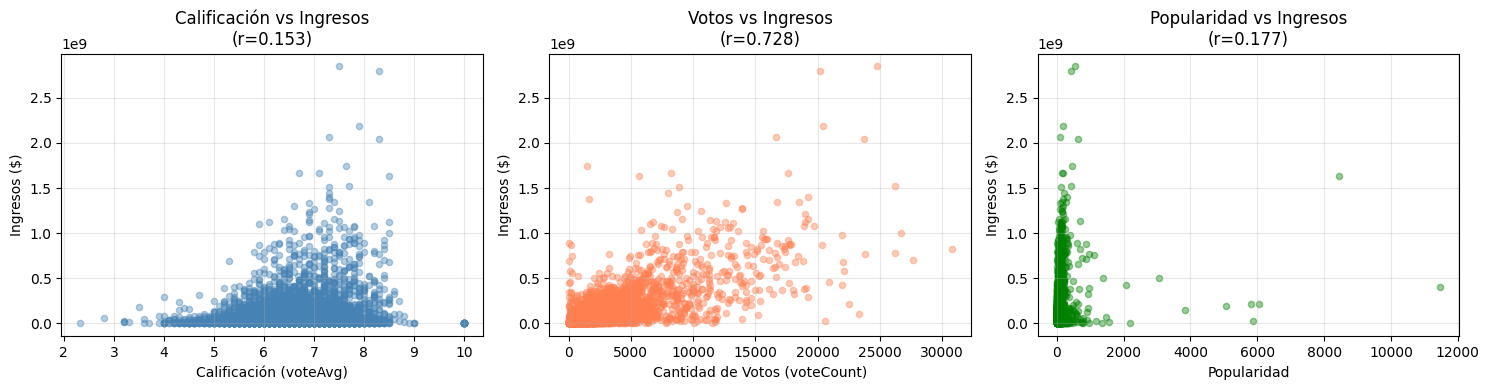

In [33]:
# Ejercicio 14: Correlación entre calificaciones y éxito comercial
df = datos[(datos['revenue'] > 0) & (datos['voteAvg'] > 0) & (datos['voteCount'] > 0)].copy()

print("="*60)
print("EJERCICIO 14: CALIFICACIONES vs ÉXITO COMERCIAL")
print("="*60)

# Correlaciones
corr_voteavg_revenue = df['voteAvg'].corr(df['revenue'])
corr_votecount_revenue = df['voteCount'].corr(df['revenue'])
corr_popularity_revenue = df['popularity'].corr(df['revenue'])

print(f"\nPelículas analizadas: {len(df):,}")
print(f"\nCorrelación voteAvg (calificación) vs revenue: {corr_voteavg_revenue:.4f}")
print(f"Correlación voteCount (cantidad votos) vs revenue: {corr_votecount_revenue:.4f}")
print(f"Correlación popularity vs revenue: {corr_popularity_revenue:.4f}")

# Gráfico
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# voteAvg vs revenue
axes[0].scatter(df['voteAvg'], df['revenue'], alpha=0.4, s=20, color='steelblue')
axes[0].set_xlabel('Calificación (voteAvg)')
axes[0].set_ylabel('Ingresos ($)')
axes[0].set_title(f'Calificación vs Ingresos\n(r={corr_voteavg_revenue:.3f})')
axes[0].grid(alpha=0.3)

# voteCount vs revenue
axes[1].scatter(df['voteCount'], df['revenue'], alpha=0.4, s=20, color='coral')
axes[1].set_xlabel('Cantidad de Votos (voteCount)')
axes[1].set_ylabel('Ingresos ($)')
axes[1].set_title(f'Votos vs Ingresos\n(r={corr_votecount_revenue:.3f})')
axes[1].grid(alpha=0.3)

# popularity vs revenue
axes[2].scatter(df['popularity'], df['revenue'], alpha=0.4, s=20, color='green')
axes[2].set_xlabel('Popularidad')
axes[2].set_ylabel('Ingresos ($)')
axes[2].set_title(f'Popularidad vs Ingresos\n(r={corr_popularity_revenue:.3f})')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 15. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

EJERCICIO 15: ESTRATEGIAS DE MARKETING

Películas analizadas: 5,398

Con página web oficial:
  Cantidad: 2,540
  Ingresos medianos: $56,069,748

Sin página web oficial:
  Cantidad: 2,858
  Ingresos medianos: $27,533,761

Con video disponible:
  Cantidad: 300
  Ingresos medianos: $204,377,462

Sin video disponible:
  Cantidad: 5,098
  Ingresos medianos: $35,351,202


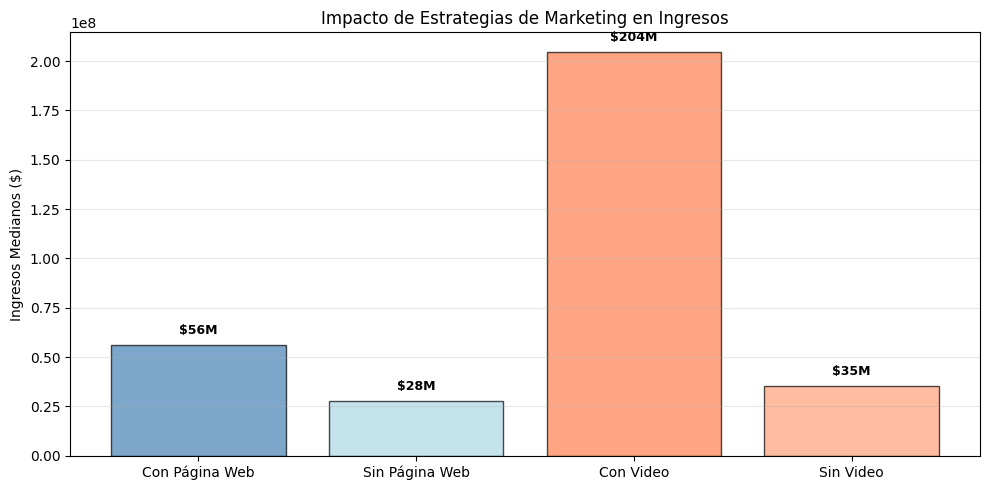

In [34]:
# Ejercicio 15: Estrategias de marketing
df = datos[(datos['revenue'] > 0)].copy()

print("="*60)
print("EJERCICIO 15: ESTRATEGIAS DE MARKETING")
print("="*60)

# Presencia en sitios web y vídeos
tiene_homepage = (df['homePage'].notna() & (df['homePage'] != '')).astype(int)
tiene_video = (df['video'].astype(bool) == True).astype(int)

print(f"\nPelículas analizadas: {len(df):,}")

print(f"\nCon página web oficial:")
print(f"  Cantidad: {tiene_homepage.sum():,}")
print(f"  Ingresos medianos: ${df[tiene_homepage==1]['revenue'].median():,.0f}")

print(f"\nSin página web oficial:")
print(f"  Cantidad: {(tiene_homepage==0).sum():,}")
print(f"  Ingresos medianos: ${df[tiene_homepage==0]['revenue'].median():,.0f}")

print(f"\nCon video disponible:")
print(f"  Cantidad: {tiene_video.sum():,}")
print(f"  Ingresos medianos: ${df[tiene_video==1]['revenue'].median():,.0f}")

print(f"\nSin video disponible:")
print(f"  Cantidad: {(tiene_video==0).sum():,}")
print(f"  Ingresos medianos: ${df[tiene_video==0]['revenue'].median():,.0f}")

# Gráfico
fig, ax = plt.subplots(figsize=(10, 5))
estrategias = ['Con Página Web', 'Sin Página Web', 'Con Video', 'Sin Video']
ingresos = [
    df[tiene_homepage==1]['revenue'].median(),
    df[tiene_homepage==0]['revenue'].median(),
    df[tiene_video==1]['revenue'].median(),
    df[tiene_video==0]['revenue'].median()
]

colors = ['steelblue', 'lightblue', 'coral', 'lightsalmon']
ax.bar(estrategias, ingresos, color=colors, edgecolor='black', alpha=0.7)
ax.set_ylabel('Ingresos Medianos ($)')
ax.set_title('Impacto de Estrategias de Marketing en Ingresos')
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(ingresos):
    ax.text(i, v + (max(ingresos) * 0.02), f'${v/1e6:.0f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### 16. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

EJERCICIO 16: POPULARIDAD DEL ELENCO vs ÉXITO COMERCIAL

Películas analizadas: 5,319

Correlación popularidad actores vs revenue: 0.2242
Correlación popularidad actores vs popularity: 0.1707


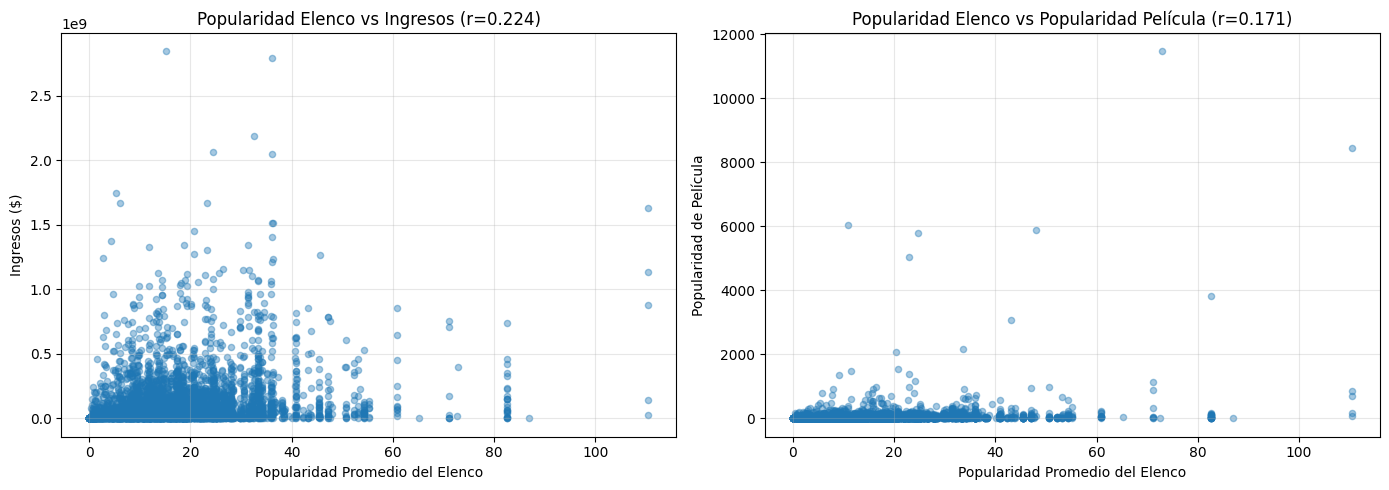

In [35]:
# Ejercicio 16: Popularidad del elenco vs éxito de taquilla
df = datos[(datos['revenue'] > 0) & (datos['actorsPopularity'].notna())].copy()

# Extraer popularidad promedio del elenco (primeros valores)
df['avg_actors_popularity'] = pd.to_numeric(df['actorsPopularity'].astype(str).str.split('|').str[0], errors='coerce')
df = df[df['avg_actors_popularity'] > 0]

print("="*60)
print("EJERCICIO 16: POPULARIDAD DEL ELENCO vs ÉXITO COMERCIAL")
print("="*60)

corr_actors_pop = df['avg_actors_popularity'].corr(df['revenue'])
corr_actors_pop2 = df['avg_actors_popularity'].corr(df['popularity'])

print(f"\nPelículas analizadas: {len(df):,}")
print(f"\nCorrelación popularidad actores vs revenue: {corr_actors_pop:.4f}")
print(f"Correlación popularidad actores vs popularity: {corr_actors_pop2:.4f}")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['avg_actors_popularity'], df['revenue'], alpha=0.4, s=20)
axes[0].set_xlabel('Popularidad Promedio del Elenco')
axes[0].set_ylabel('Ingresos ($)')
axes[0].set_title(f'Popularidad Elenco vs Ingresos (r={corr_actors_pop:.3f})')
axes[0].grid(alpha=0.3)

axes[1].scatter(df['avg_actors_popularity'], df['popularity'], alpha=0.4, s=20)
axes[1].set_xlabel('Popularidad Promedio del Elenco')
axes[1].set_ylabel('Popularidad de Película')
axes[1].set_title(f'Popularidad Elenco vs Popularidad Película (r={corr_actors_pop2:.3f})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## EJERCICIO 5: Puntos extras

### 1. ¿Cuáles son los 5 directores que han generado más ingresos totales?

In [36]:
# 1. ¿Cuáles son los 5 directores que han generado más ingresos totales?
ingresos_por_director = datos.groupby('director')['revenue'].sum().sort_values(ascending=False).head(5)
print("=" * 80)
print("TOP 5 DIRECTORES POR INGRESOS TOTALES")
print("=" * 80)
print(ingresos_por_director.map('{:,.2f}'.format).to_string())

TOP 5 DIRECTORES POR INGRESOS TOTALES
director
Steven Spielberg           9,770,792,563.00
James Cameron              7,663,972,816.00
Anthony Russo|Joe Russo    6,842,534,434.00
Peter Jackson              6,540,703,862.00
Michael Bay                6,451,728,504.00
